# Tad1141 detailed analysis

Rows: 384 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): #chr, effect, type
dbl (4): pos, mid, up, low

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 657 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): #chr, strand, gene_id, gene_name, gene_type
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 291 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): X4
dbl (5): start1, end1, start2, end2, n

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Ro


Neu eQTL APOL2      Inh APOL2     eQTL APOL2     pQTL APOL2         H3K9ac 
          6075              0           3099           3099           3099 
          DNAm 
          3099 

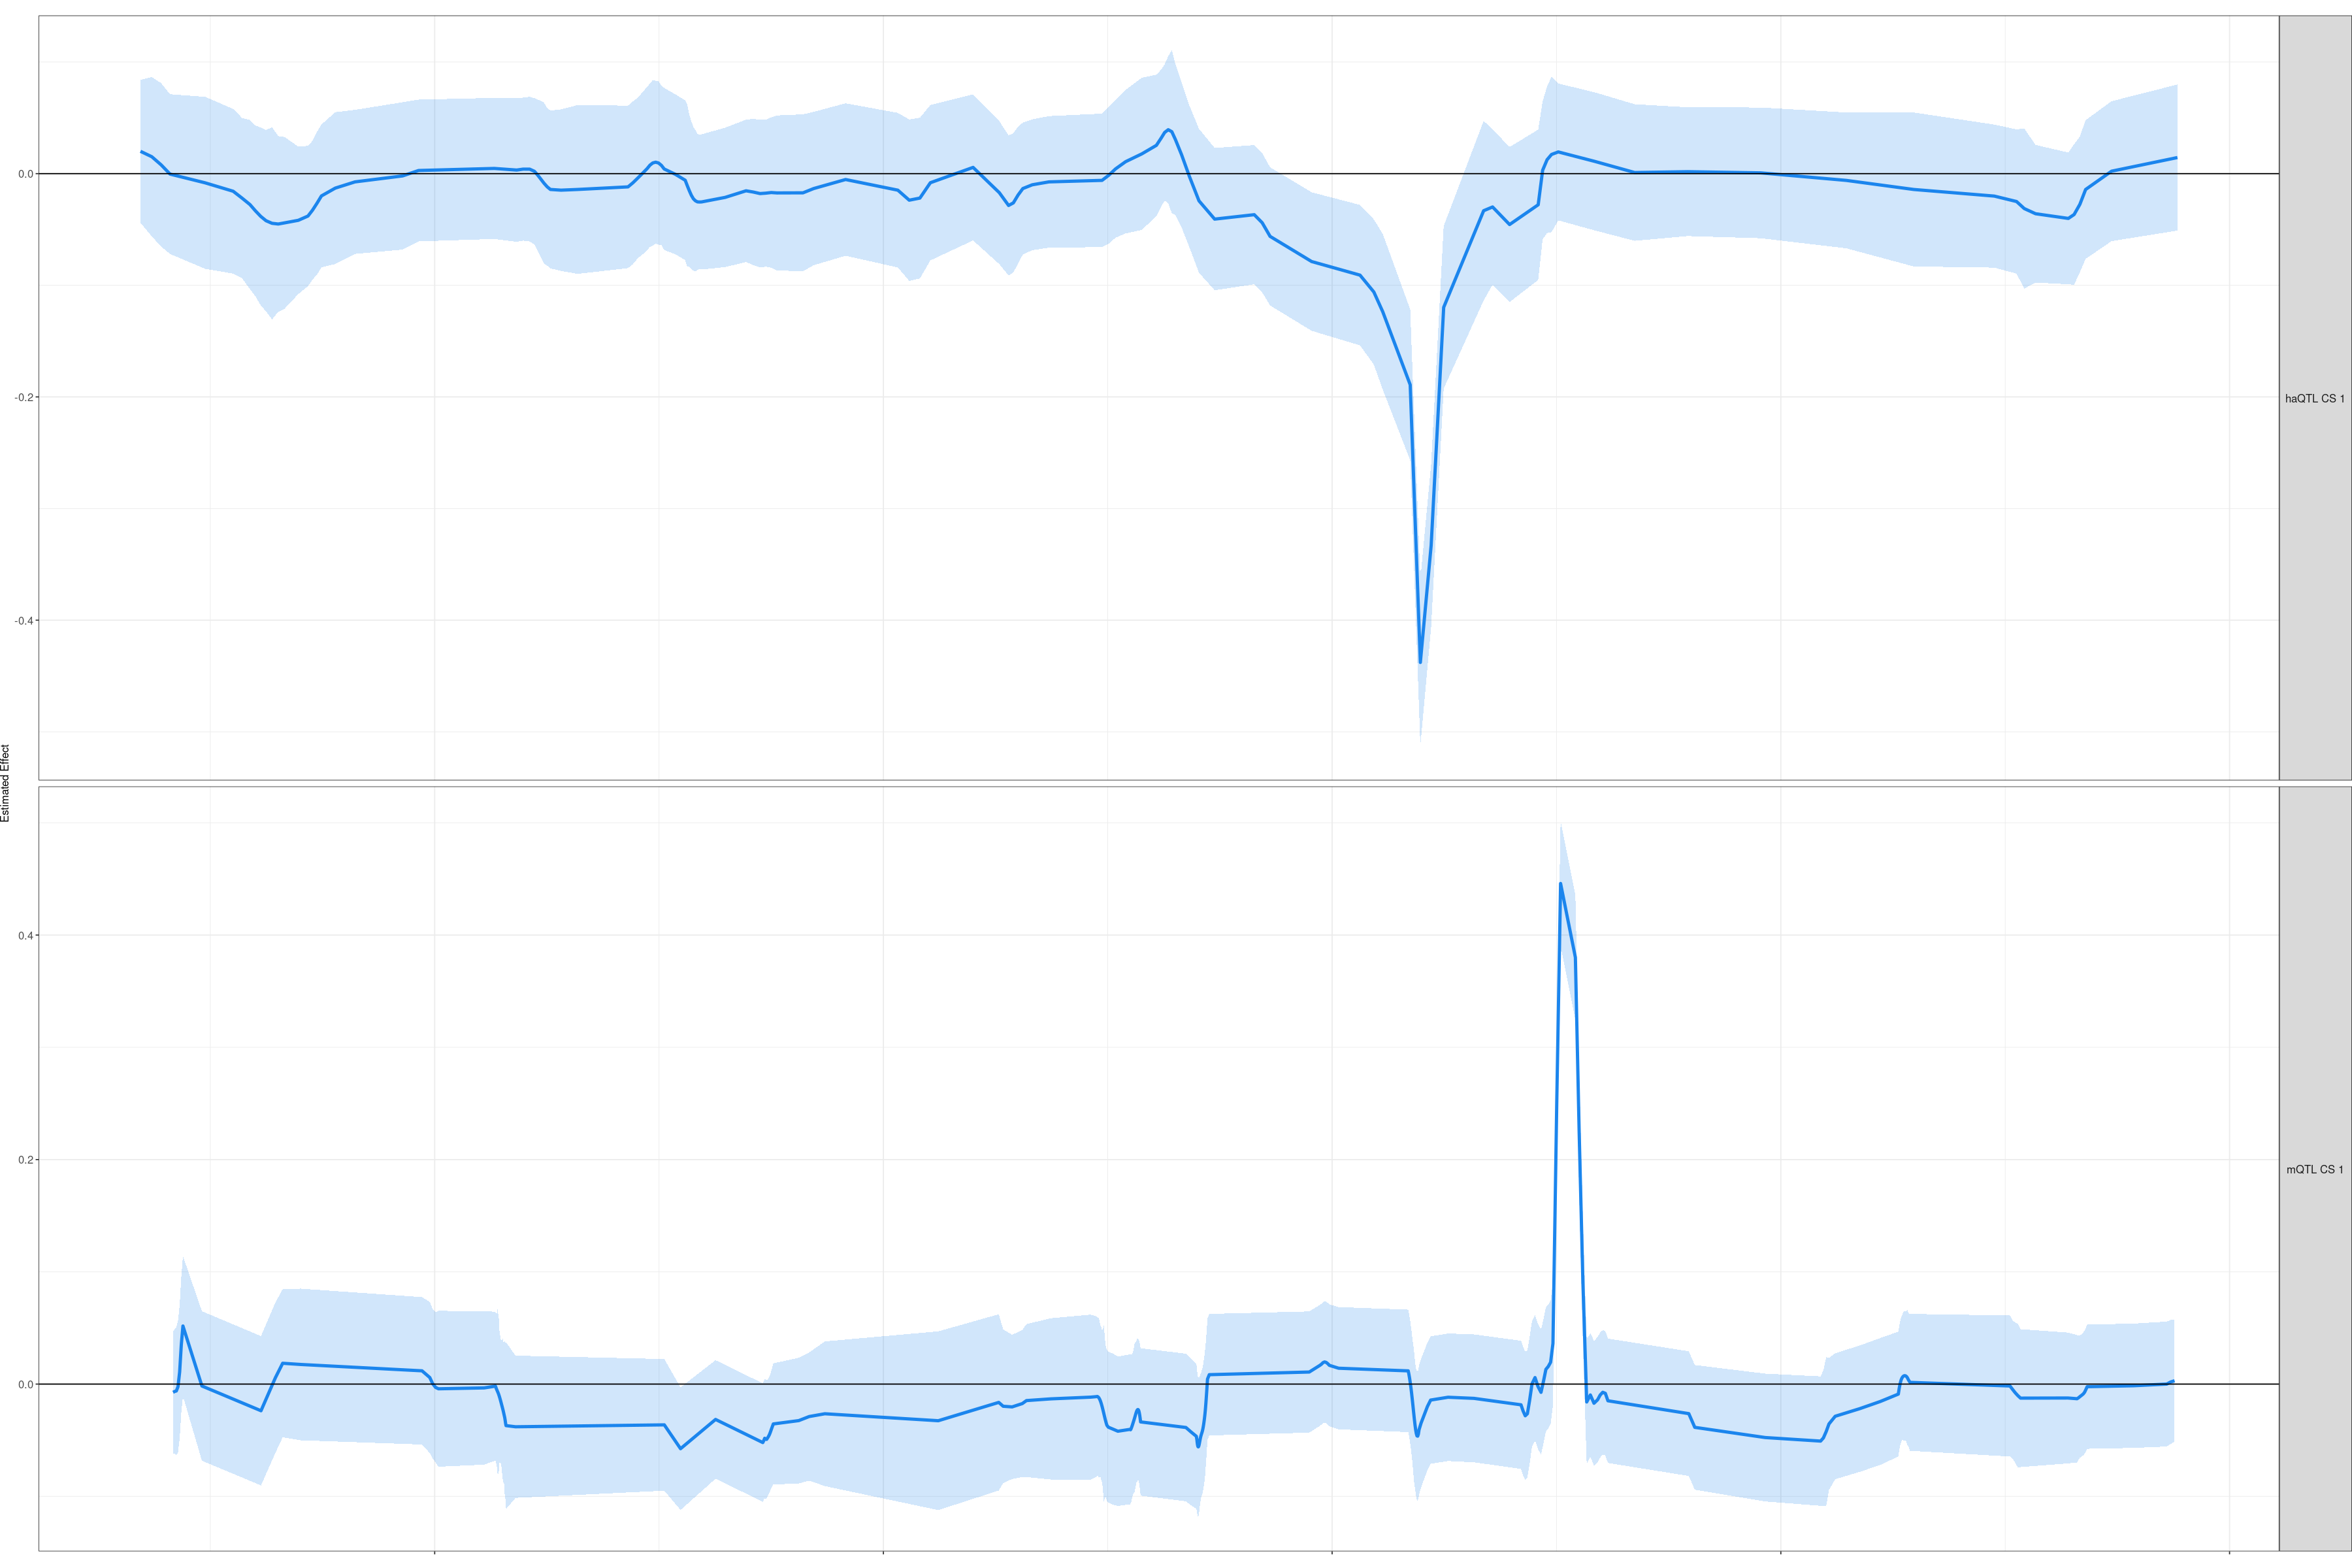

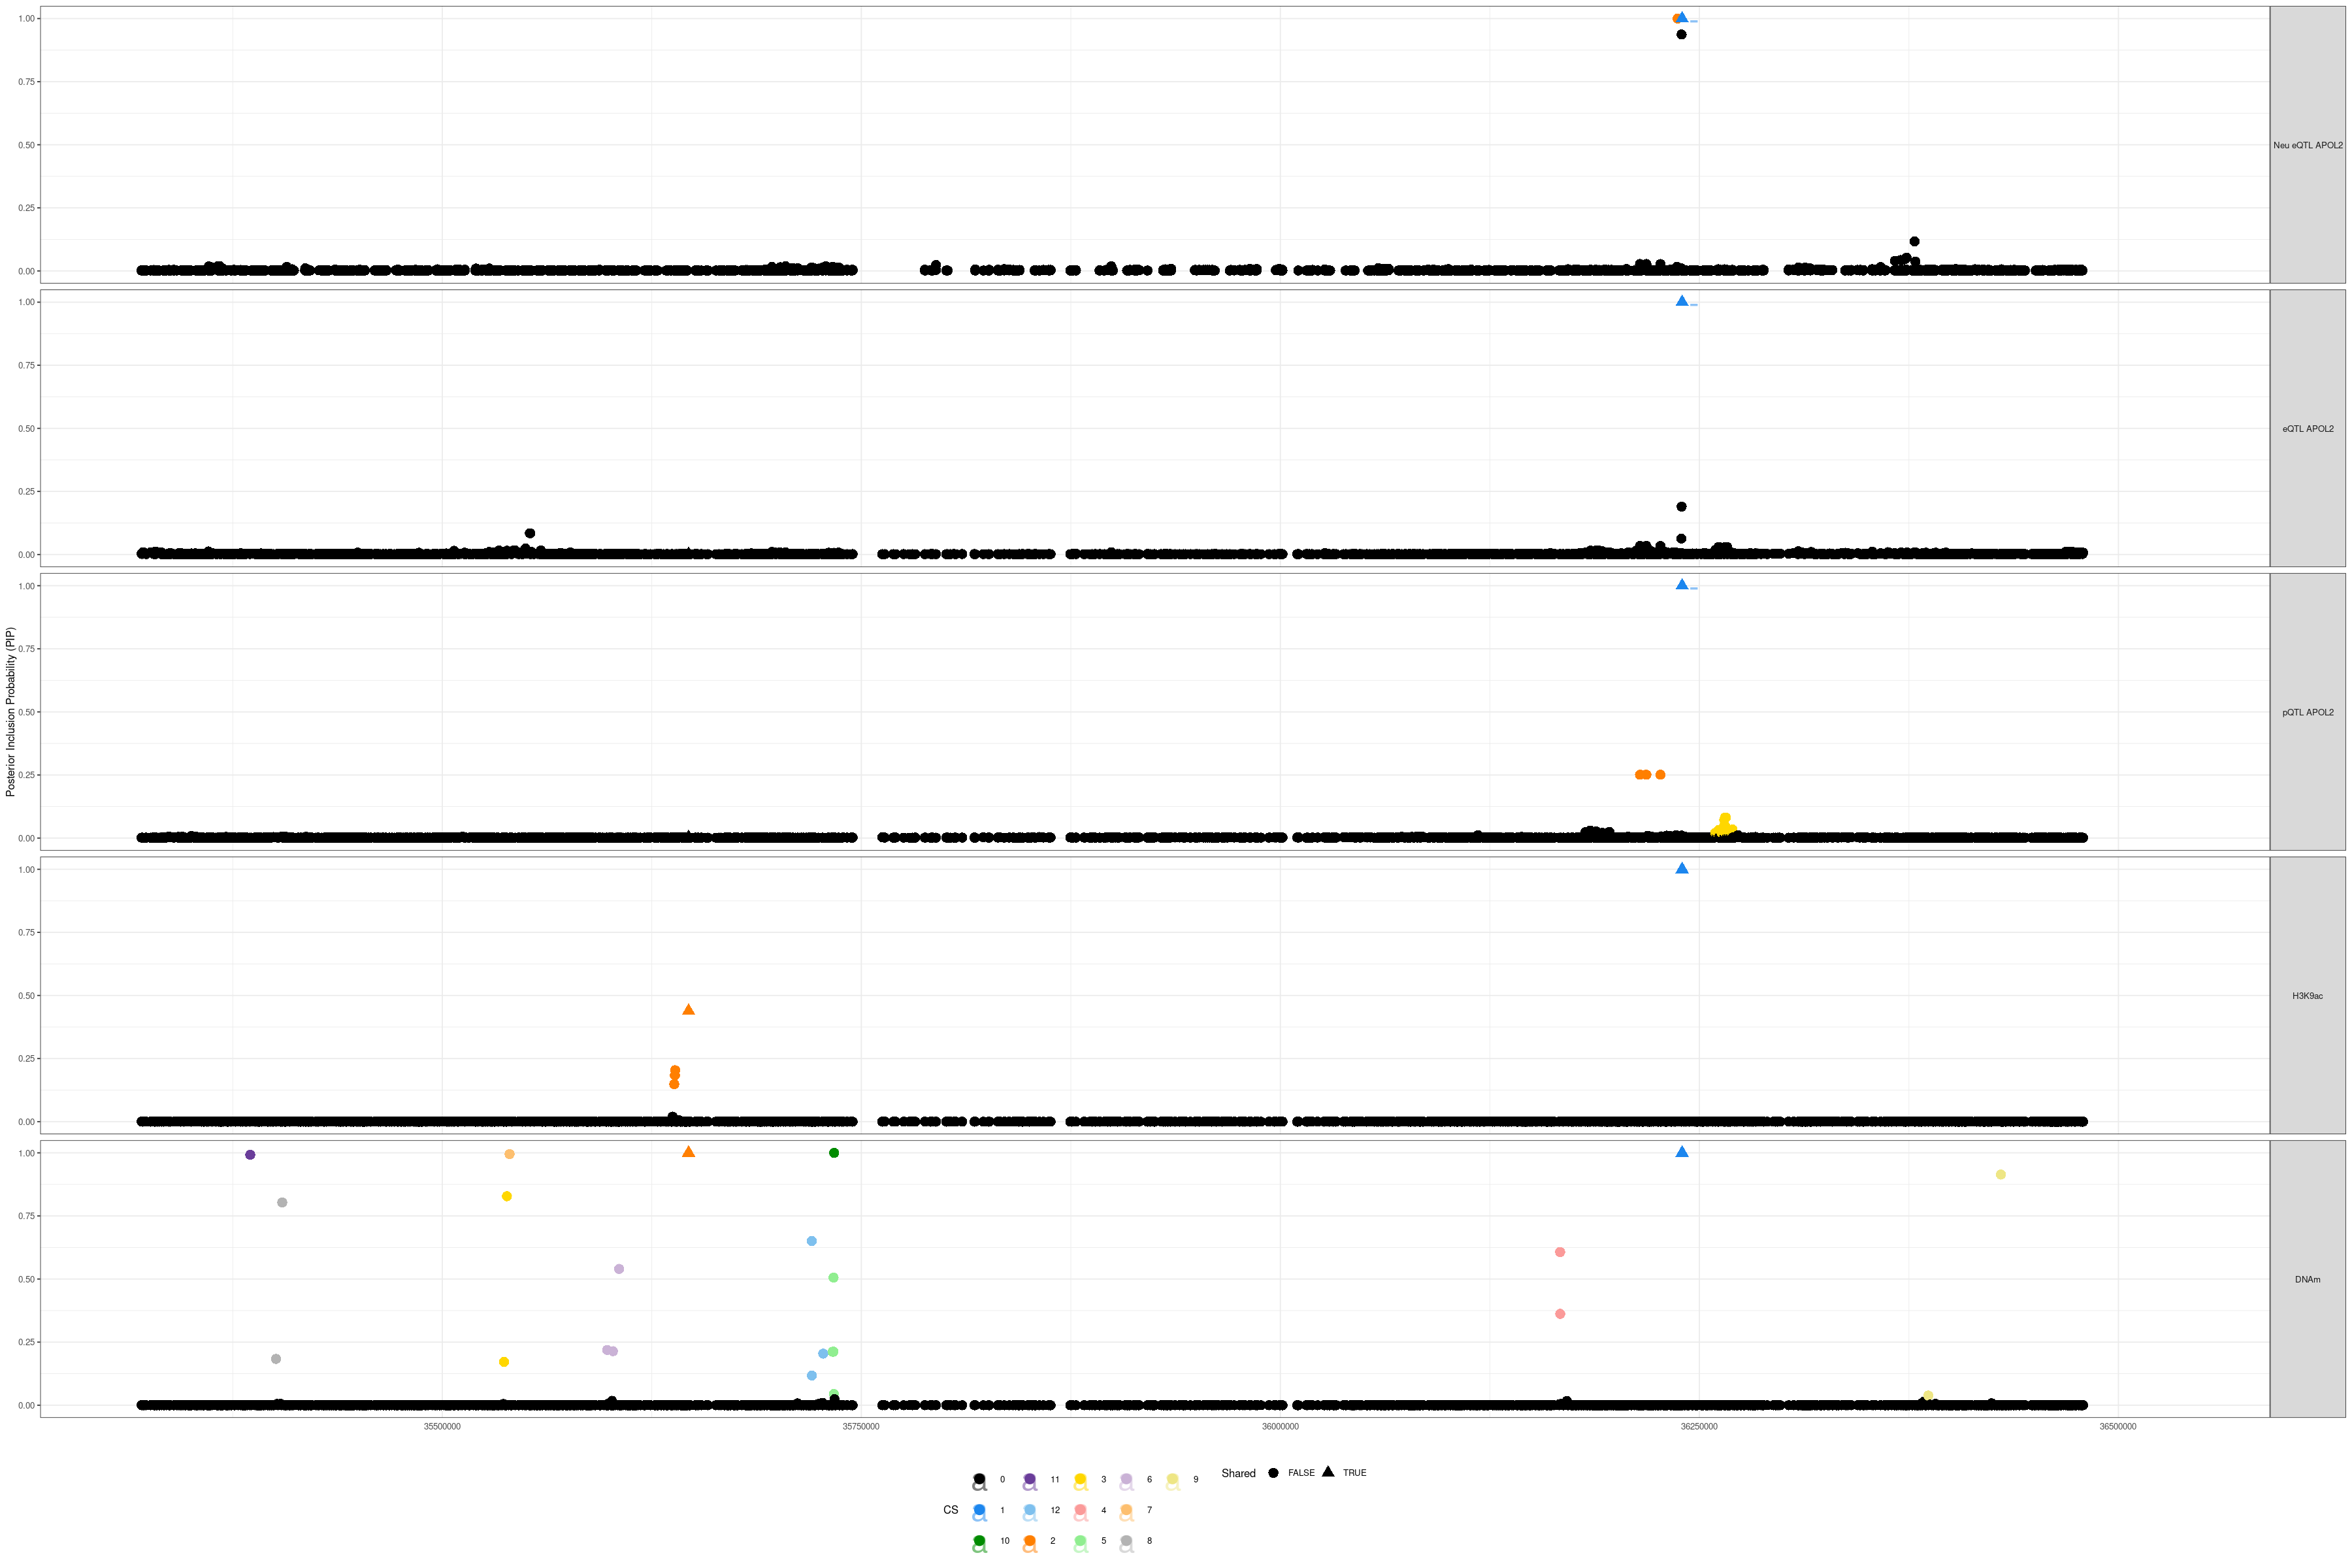

Warning message:
“Duplicated aesthetics after name standardisation: colour”
Warning message:
“Duplicated aesthetics after name standardisation: colour”
Warning message:
“Duplicated aesthetics after name standardisation: colour”


mapping: xintercept = 36480000 
geom_vline: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

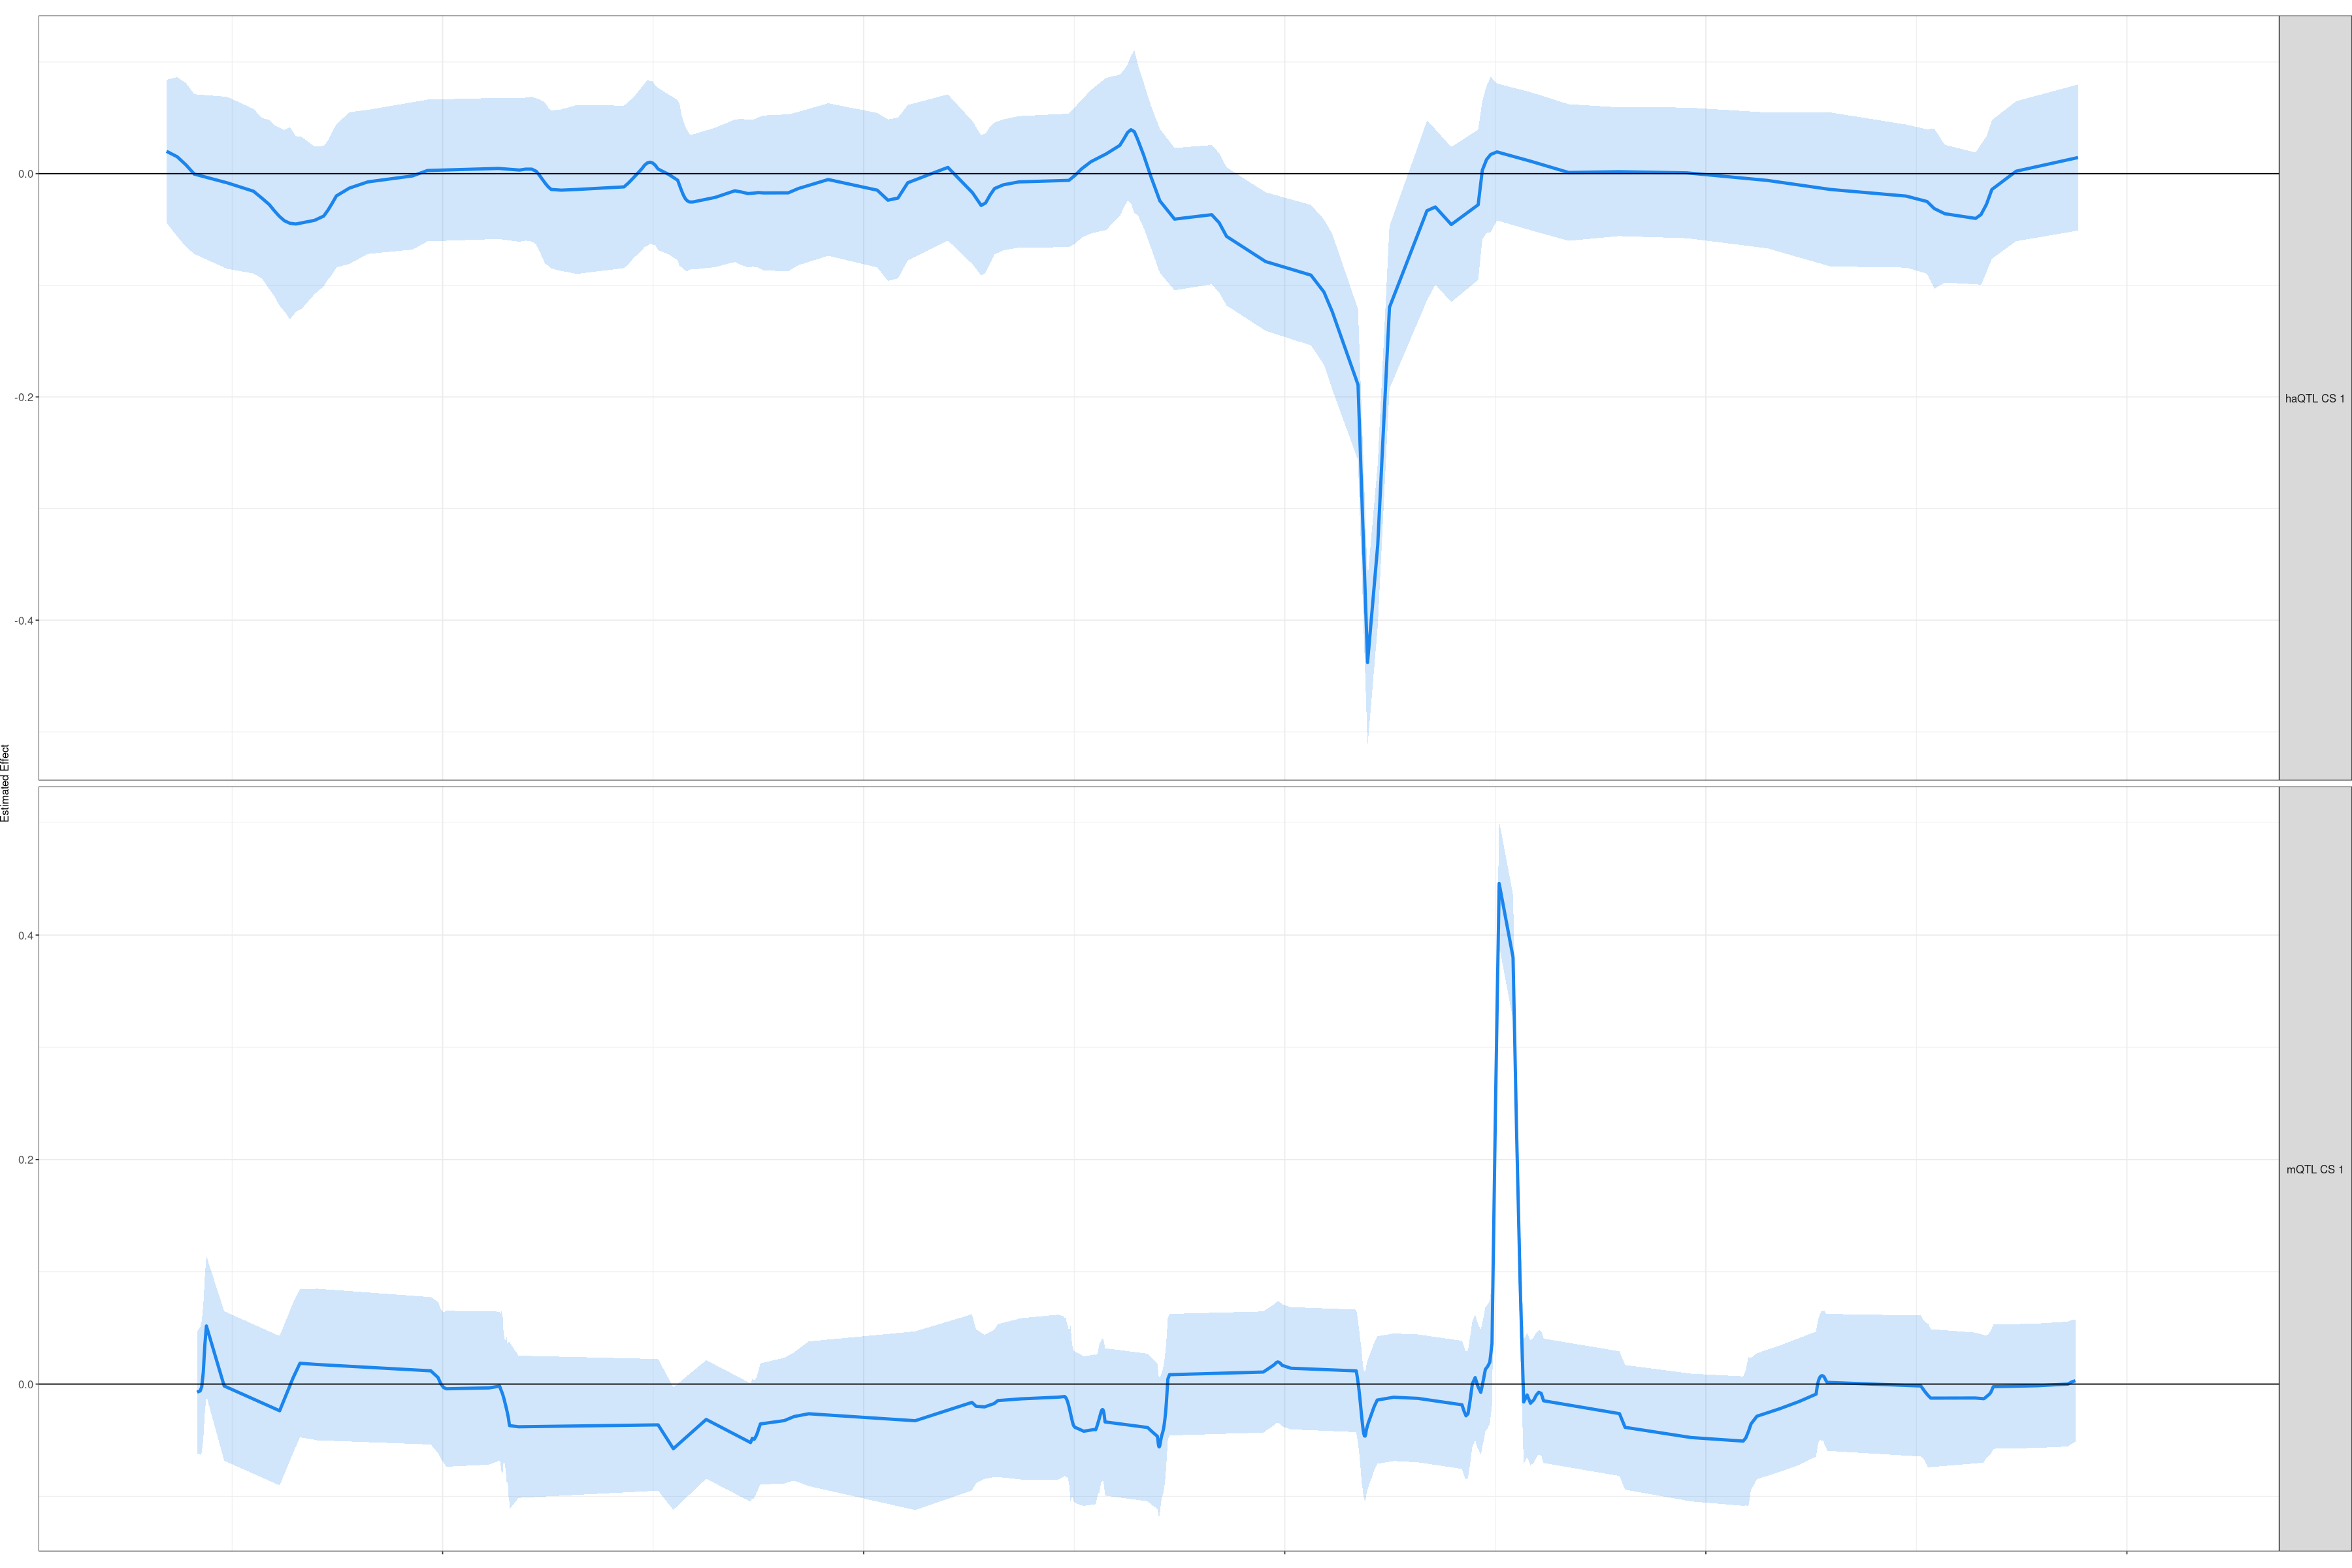

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


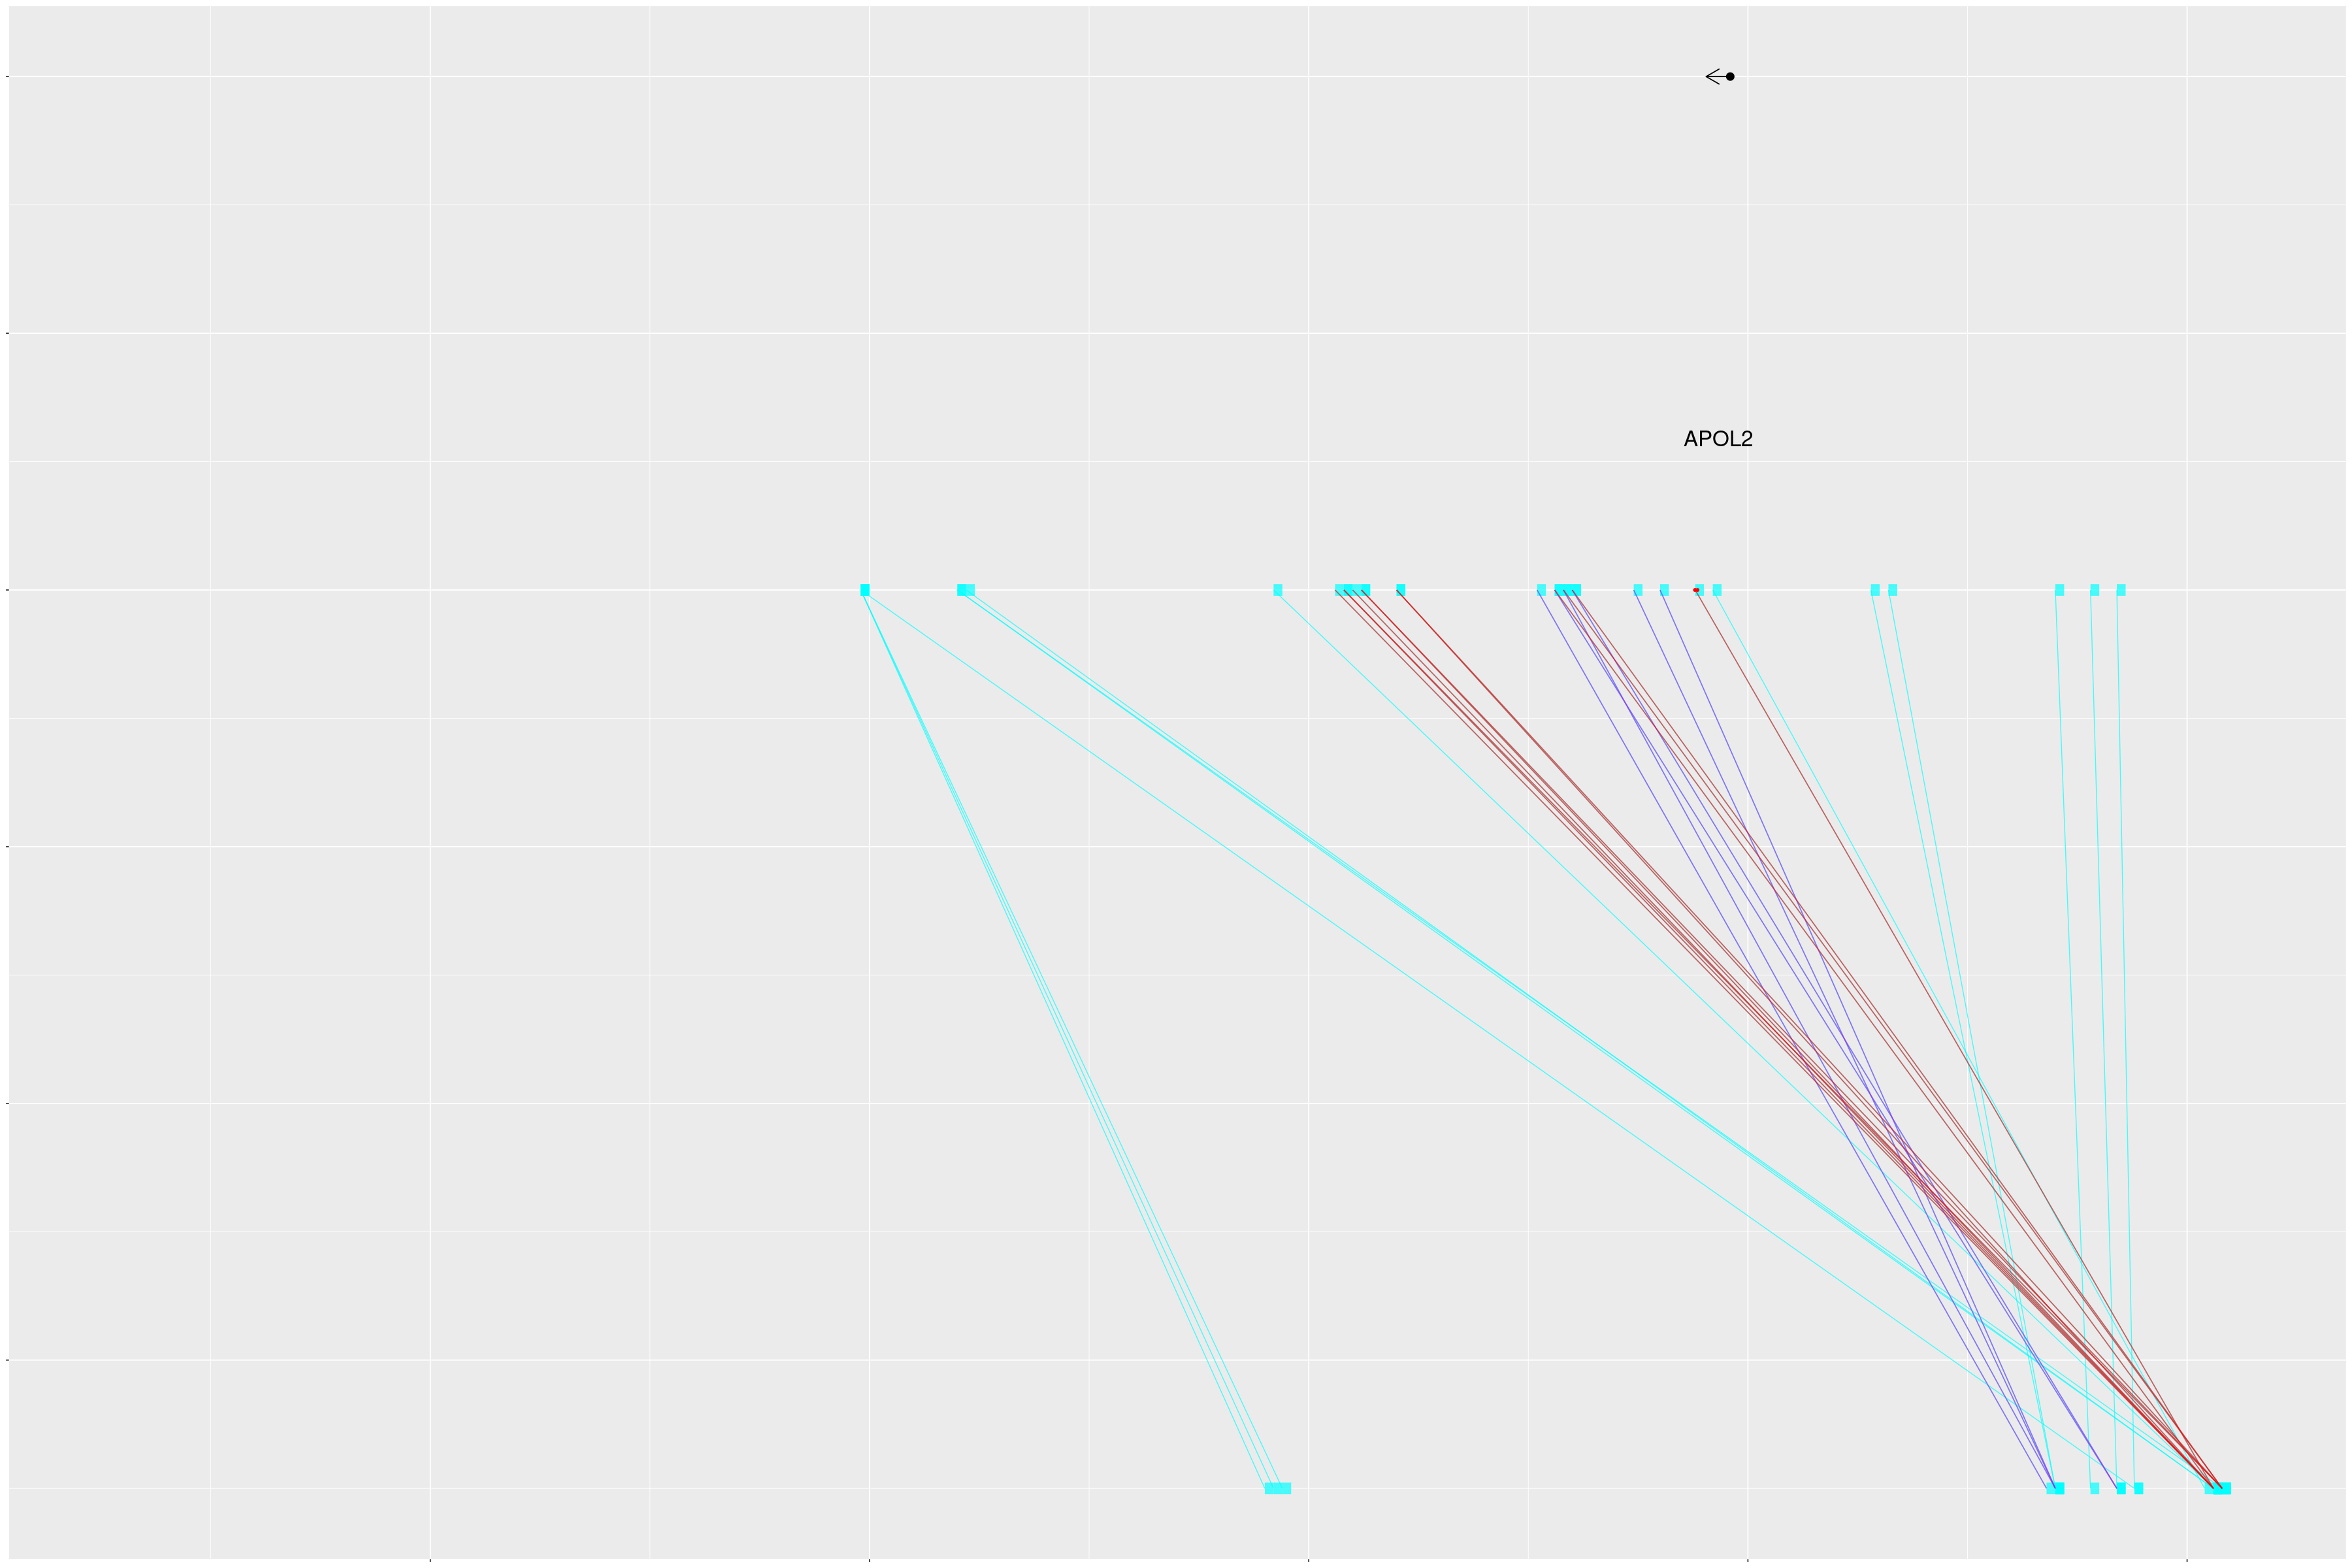

In [204]:
library("dplyr")
library("readr")
library("stringr")
library("purrr")
library("tidyr")
library("ggplot2")
library("cowplot")
library("ComplexUpset")
effect1411 = read_delim("../data/case_study_tad1411/4_tad1411effect_superfine.tsv")
gene_plot75  = read_delim("../data/case_study_tad1411/4_tad1411gene_info.tsv")%>%mutate(strand = strand%>%as.factor%>%as.numeric)
simul_tf=read_delim("../data/case_study_tad1411/4_tad1411_annotation_simul_tf","\t")
Neu_int = read_delim("../data/resource//Neu_hg38.Int.Nott.tsv")
Oli_int = read_delim("../data/resource//Oli_hg38.Int.Nott.tsv")
rbind(Neu_int%>%mutate(type = "Neu"),Oli_int%>%select(-`...1`)%>%mutate(type = "Oli"))-> annotation

gene_plot75 = gene_plot75%>%filter(gene_id %in% c("ENSG00000128335"))
chr_select = "chr22"
#gene_plot[4,] = gene_plot[3,]
gene_plot75$x_label <- (0.5*(gene_plot75$end-gene_plot75$start)+gene_plot75$start)
nn = 0.9

n = c(1,2,3,4)
color = color2 = c("black", "dodgerblue2", "#6A3D9A","#FF7F00","skyblue2","#6A3D9A",
                   "gold1",  "#FB9A99", "palegreen2",
                   "#CAB2D6", "#FDBF6F", "gray70", "khaki2", "maroon", "orchid1",
                   "deeppink1", "blue1", "steelblue4", "darkturquoise", "green1",
                   "yellow4", "yellow3","darkorange4","brown","navyblue","#FF0000",
                   "darkgreen","#FFFF00","purple","#00FF00","pink","#0000FF",
                   "orange","#FF00FF","cyan","#00FFFF","#FFFFFF")




#refine_effect_plot =  read_delim(paste(path,"4_1182_effect.tsv", sep=""))
refine_effect_plot<-  ggplot( effect1411  )+
  geom_line(aes(x = pos, y = mid,color = effect), size=1.4)+
  geom_ribbon(aes(x = pos,
                  y = mid,
                  ymin = low,
                  ymax = up,
                  fill = effect),
              alpha = 0.2)+
  ylab("Estimated Effect") +
  xlab("POS")+
  facet_grid(factor(type,levels =  c("haQTL_Effect_1",
                                     "mQTL_Effect_1"
                                     ),
                    labels =   c("haQTL CS 1",
                                 "mQTL CS 1")
  )~., scales = "free" )+
  scale_color_manual("Credible set",values = color2[n+1])+
  geom_hline(aes(yintercept = 0), color = "black")+
  scale_fill_manual("Credible set",values = color2[n+1])+
  theme_bw()+
  xlab("") +
  ylab("Estimated Effect")+
  theme(text = element_text(size = 10),
        legend.position="none")+
  theme(plot.margin=unit(c(5,0,0,0),"mm"),
        strip.text.y.right = element_text(angle = 0,
                                          size = 10),
        axis.text.x = element_blank(),
        axis.text.y = element_text(size = 10)
  )


refine_effect_plot


refine_plot =read_delim("../data/case_study_tad1411/4_tad1411pip_superfine.tsv","\t")
plot_range = c(min(refine_plot$pos),max(refine_plot$pos))
plot_range[2] = 36530000
refine_plot$molecular_trait_id  [ which(str_detect(refine_plot$molecular_trait_id,"haQTL"))]<- "H3K9ac"
refine_plot$molecular_trait_id  [ which(str_detect(refine_plot$molecular_trait_id,"mQTL"))]<- "DNAm"
refine_plot$molecular_trait_id  [ which(refine_plot$molecular_trait_id =="pQTL 22_APOL2_Q9BQE5" )]<- "pQTL APOL2"
refine_plot$molecular_trait_id  [ which(str_detect(refine_plot$molecular_trait_id,"Exc"))]<- "Neu eQTL APOL2"
refine_plot$molecular_trait_id <- factor(refine_plot$molecular_trait_id,level = c(level = c("Neu eQTL APOL2","Inh APOL2","eQTL APOL2","pQTL APOL2","H3K9ac","DNAm")))
refine_plot = refine_plot%>%filter(!is.na(molecular_trait_id))
color = color2 = c("black", "dodgerblue2","green4","#6A3D9A","skyblue2", "#FF7F00",
                   "gold1",  "#FB9A99", "palegreen2",
                   "#CAB2D6", "#FDBF6F", "gray70", "khaki2", "maroon", "orchid1",
                   "deeppink1", "blue1", "steelblue4", "darkturquoise", "green1",
                   "yellow4", "yellow3","darkorange4","brown","navyblue","#FF0000",
                   "darkgreen","#FFFF00","purple","#00FF00","pink","#0000FF",
                   "orange","#FF00FF","cyan","#00FFFF","#FFFFFF")
##### Change coloring of non-overlap CS
#refine_plot%>%mutate(new_CS = case_when(molecular_trait_id == "Oli TMEM131L" & new_CS == 2 ~  9,
#                                    molecular_trait_id == "H3K9ac" & new_CS == 2 ~  10,
#                                     molecular_trait_id == "DNAm" & !Shared & new_CS == 1 ~  11,
#                                    .default = new_CS 
#                                   ))-> refine_plot

#### Add sign annotation, see pseudobulk notebook for code to gather this info
#sign = 
# refine_plot%>%group_by(molecular_trait_id, new_CS)%>%
#    summarize(pos = max(pos[which(y == max(y))]), y = max(y))%>%filter(new_CS != 0)%>%
#    filter(!molecular_trait_id%in% c("H3K9ac", "DNAm")) %>%ungroup%>%mutate(sign = c("-","-","-","+","-") )
#refine_plot = left_join(refine_plot,sign)
#

### Add sign annotation, see pseudobulk notebook for code to gather this info
sign = 
refine_plot%>%group_by(molecular_trait_id, new_CS)%>%
    summarize(pos = max(pos[which(y == max(y))]), y = max(y))%>%filter(new_CS != 0)%>%
    filter(molecular_trait_id%in% c("eQTL APOL2", "pQTL APOL2","Neu eQTL APOL2"),new_CS == 1) %>%ungroup%>%mutate(sign = c("-") )

refine_plot = left_join(refine_plot,sign)


table(refine_plot$molecular_trait_id )
refine_plot  <-  ggplot2::ggplot(refine_plot,aes(y = y,
                                                 x = pos,
                                                 col =  as.factor(new_CS))) +
  geom_text(alpha = 0.5, aes(x =pos + 7000, y = y ,color =  as.factor(new_CS), label = sign ) ,data = sign, size = 10)+
  facet_grid(molecular_trait_id ~.)+
  geom_point(size = 4,aes(
                                                 shape = Shared )) +
  scale_color_manual("CS",values = color) +
  theme_bw()+
  theme(axis.ticks.x = element_blank()) +
  ylab("Posterior Inclusion Probability (PIP)")+
  xlim(plot_range)+
  theme(axis.ticks.x = element_blank() ) +
  theme(strip.text.y.right = element_text(angle = 0))+
  xlab("") +
  theme(text = element_text(size = 10),legend.position = "bottom")
refine_plot


refine_effect_plot+
  xlim(plot_range)
gene_plot_plot <-ggplot(gene_plot75,aes()) +
  geom_segment( aes(x = start,xend = end, y = (nn-strand/100), yend =(nn-strand/100) ) ,
                arrow = arrow(length = unit(0.5, "cm")) )+
  geom_text(aes(x = x_label,y = 0.875, label = gene_name, vjust=-1),
            size = 7)+
  ylab("")+
  xlab("")+
  theme(legend.position="none")+
  theme(text = element_blank())+
  xlim(plot_range)+
  geom_point(aes(x = start, y = (nn-strand/100)),
             color = "black",size = 3  )+        
    geom_segment(color = "cyan", aes(color = type,x = start,xend = end, y = 0.87, yend =  0.87),alpha = 0.7,size = 5, data = annotation%>%select(type,start = start1, end = end1, chr = chr1)%>%filter(chr == chr_select, start > plot_range[[1]],start < plot_range[[2]],type =="Neu"  )  ) +
    geom_segment(color = "cyan", aes(color = type,x = start,xend = end, y = 0.835, yend =  0.835),alpha = 0.7,size = 5, data = annotation%>%select(type,start = start2,start1, end = end2, chr = chr1)%>%filter(chr == chr_select, start > plot_range[[1]],start < plot_range[[2]],type =="Neu"  )  ) +
    geom_segment(color = "cyan", aes(x = start1,xend = start2, y = 0.87 , yend = 0.835 ),alpha = 0.7,size = 0.4, color  = "purple",  annotation%>%select(type, start2,start1,  chr = chr1)%>%filter(chr == chr_select, start1 > plot_range[[1]],start1 < plot_range[[2]],type =="Neu"  )  ) +
    #geom_segment( color = "cyan",aes(x = start,xend = end, y = 0.87, yend =  0.87),alpha = 0.7,size = 5, data = annotation%>%filter(chr1 == chr_select,start1 > 36000000 , start1 < 36226209 , start1 > plot_range[[1]],start1 < plot_range[[2]],type =="Neu"  )%>%rename(start = start1, end = end1, chr = chr1)  ) +
    #geom_segment( color = "cyan",aes(x = start,xend = end, y = 0.835, yend =  0.835),alpha = 0.7,size = 5, data = annotation%>%filter(chr1 == chr_select,start1 > 36000000 , start1 < 36226209 , start1 > plot_range[[1]],start1 < plot_range[[2]],type =="Neu")%>%rename(start = start2, end = end2, chr = chr1)  ) +
    geom_segment( color = "purple",aes(x = start1,xend = start2, y = 0.87 , yend = 0.835 ),alpha = 0.6,size = 0.5, color  = "purple",  simul_tf%>%count(start1,end1,start2,end2)%>%filter(start2 < 36500000 )%>%rename( end = end2))+
    geom_segment( color = "red",aes(x = start1,xend = start2, y = 0.87 , yend = 0.835 ),alpha = 0.6,size = 0.5, color  = "purple",  simul_tf%>%count(start1,end1,start2,end2)%>%filter(start2 > 36500000 )%>%rename( end = end2)  )+

    #geom_segment( color = "purple",aes(x = start1,xend = start2, y = 0.87 , yend = 0.835 ),alpha = 0.6,size = 0.5, color  = "purple",  annotation%>%filter(chr1 == chr_select,start1 > 36000000 , start1 < 36226209  , start1 > plot_range[[1]],start1 < plot_range[[2]],type =="Neu", start2 < 36500000  )%>%rename( end = end2, chr = chr1)  ) +
    #geom_segment( color = "red",aes(x = start1,xend = start2, y = 0.87 , yend = 0.835 ),alpha = 0.6,size = 0.5, color  = "red",  annotation%>%filter(chr1 == chr_select,start1 > 36000000 , start1 < 36226209  , start1 > plot_range[[1]],start1 < plot_range[[2]],type =="Neu",start2 > 36500000  )%>%rename( end = end2, chr = chr1)  ) + 
geom_point( color = "red",aes(x = 36219878, y = 0.87  ),alpha = 1,size = 1 ) +  geom_point( color = "red",aes(x = 36221298, y = 0.87  ),alpha = 1,size = 1 )#+
#geom_point( color = "red",aes(x = 36505275, y = 0.87  ),alpha = 1,size = 1 ) +  geom_point( color = "red",aes(x = 36529241, y = 0.87  ),alpha = 1,size = 1 )+

    geom_vline( color = "black",aes(xintercept = 36480000 ),alpha = 1,size = 1 ) 

gene_plot_plot







cowplot::plot_grid(plotlist = list(refine_effect_plot+theme(strip.text.y.right = element_text(angle = 0,size = 20),axis.text.y = element_text(size = 18), 
                                           panel.spacing=unit(0.7, "lines"))+
                                     xlim(plot_range)+
                                     theme(text = element_text(size = 30)),#microglia_enhancer_activity,#+facet_grid(TargetGene_name~., scales = "free"),
                                   gene_plot_plot+
                                     theme_bw()+
                                     theme(axis.text.x = element_blank(),
                                           axis.text.y = element_blank()) +
                                     theme(strip.text.y.right = element_text(angle = 0))+
                                     xlab("")+
                                     theme(text = element_text(size = 20)),
                                   refine_plot+
                                     theme_bw()+
                                     theme(axis.ticks.x = element_blank()) +#scale_x_continuous(breaks=seq(35000000,36500000,length.out =  9))+
                                     theme(strip.text.y.right = element_text(angle = 0,size = 20))+
                                     xlab("") +ylim(c(0,1))+theme(text = element_text(size = 20),axis.text.x = element_text(size = 30), axis.text.y = element_text(size = 18), 
                                           panel.spacing=unit(0.7, "lines"),legend.position = "none")+scale_y_continuous(breaks = c(0,0.5,1))
                                   
) ,
ncol = 1,
align = "v",
axis = "tlbr",
rel_heights = c(5,2,6),labels  = c("A","B","C"),label_size = 25
)-> result_plot



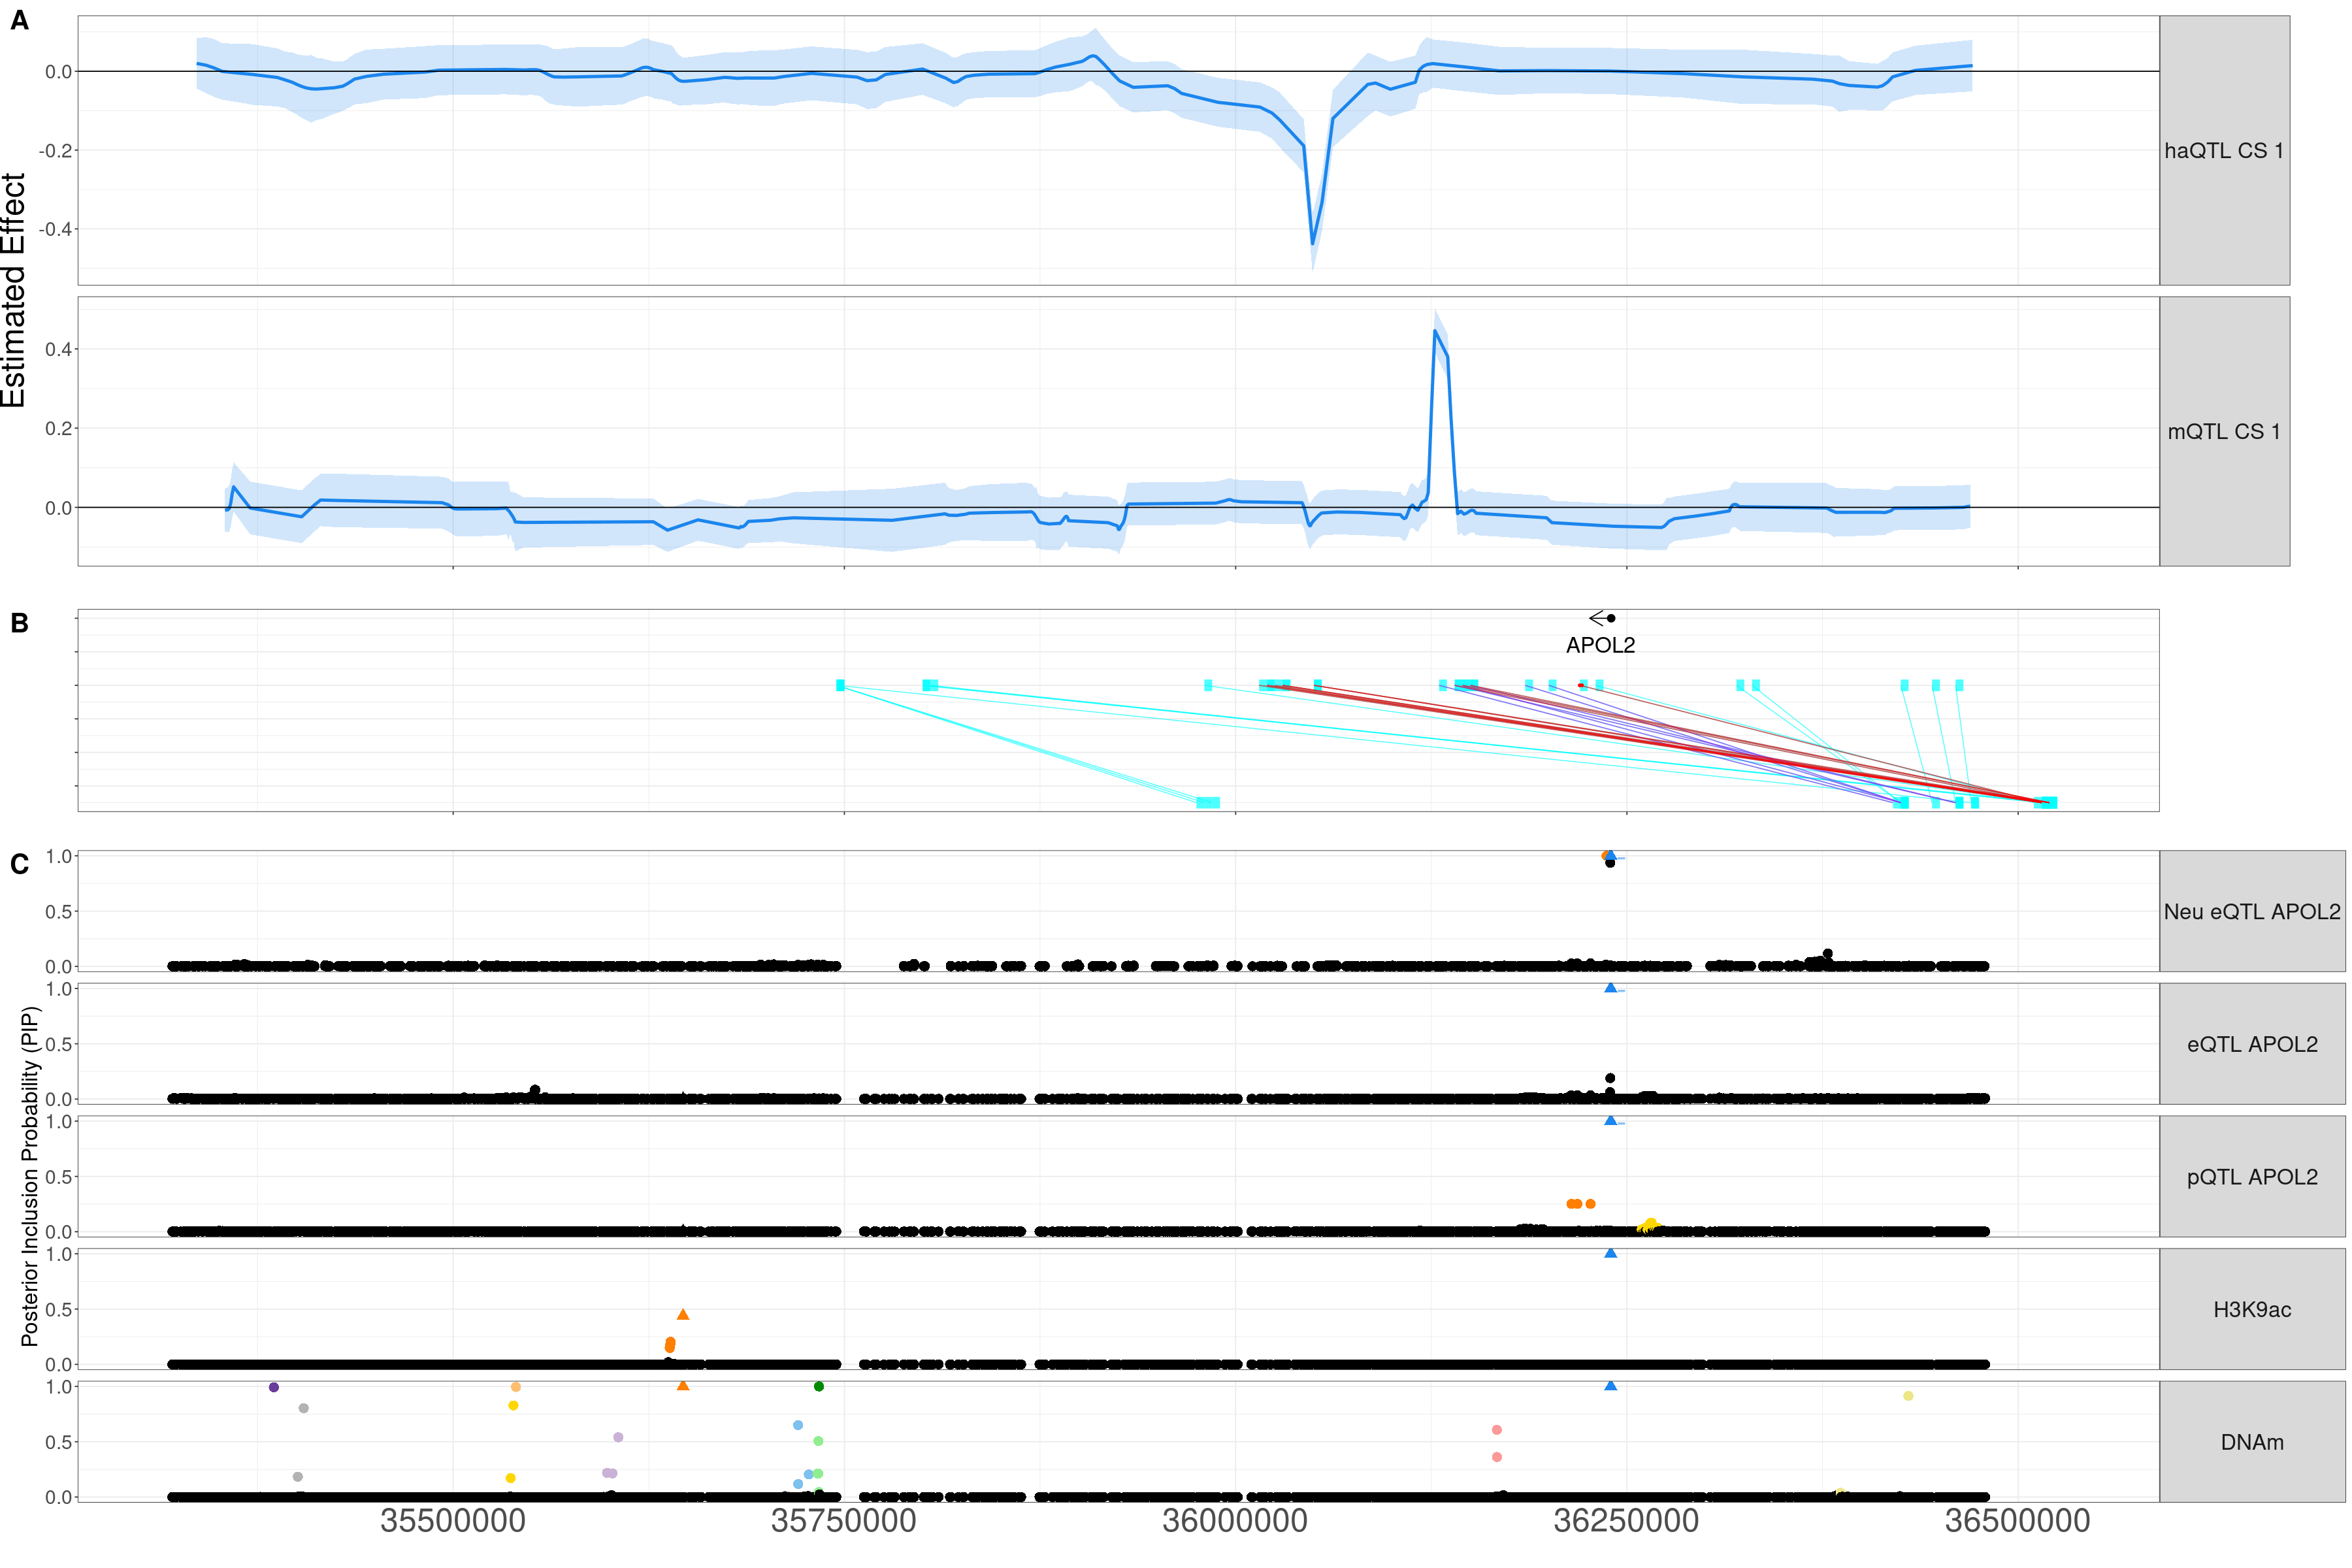

In [205]:
result_plot

In [68]:
options(repr.plot.width =30, repr.plot.height = 20)

In [88]:
seq(plot_range[1],plot_range[2],length.out =  20)

[1] 35320601 35383727 35446854 35509980 35573106 35636232 35699359 35762485
 [9] 35825611 35888737 35951864 36014990 36078116 36141242 36204369 36267495
[17] 36330621 36393747 36456874 36520000

Warning message:
“Removed 17 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_segment()`).”


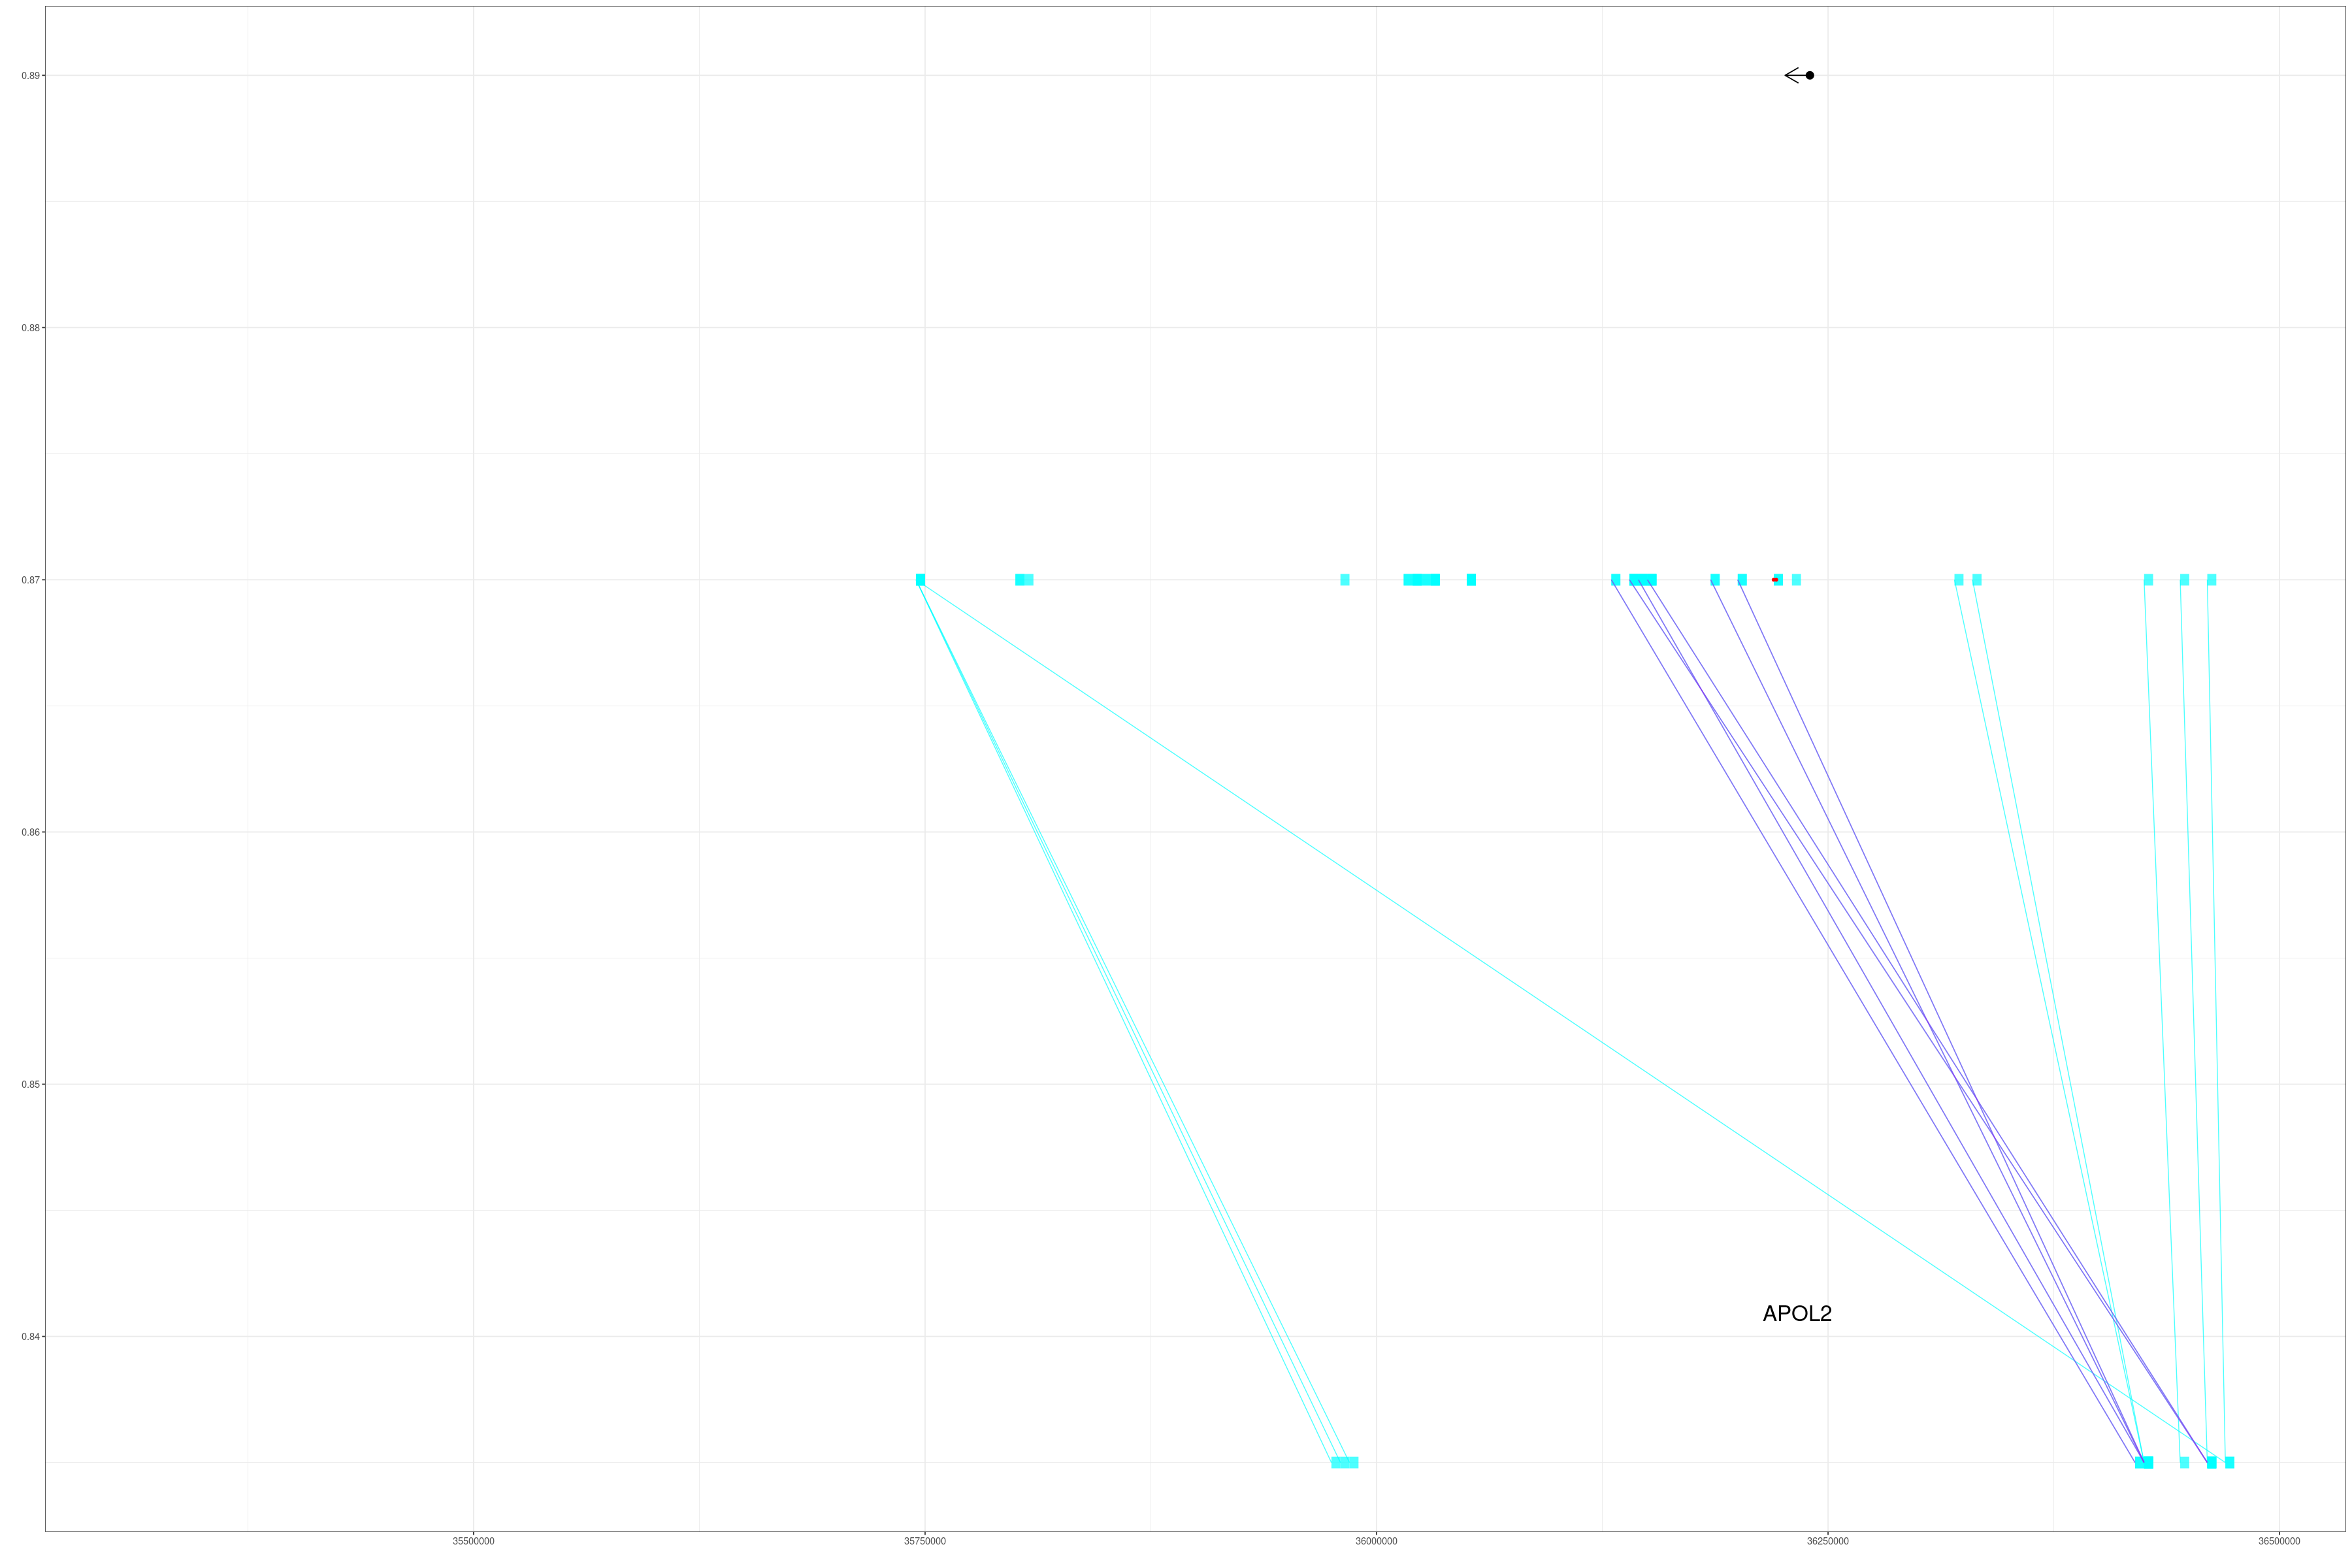

In [13]:
gene_plot_plot+theme_bw()

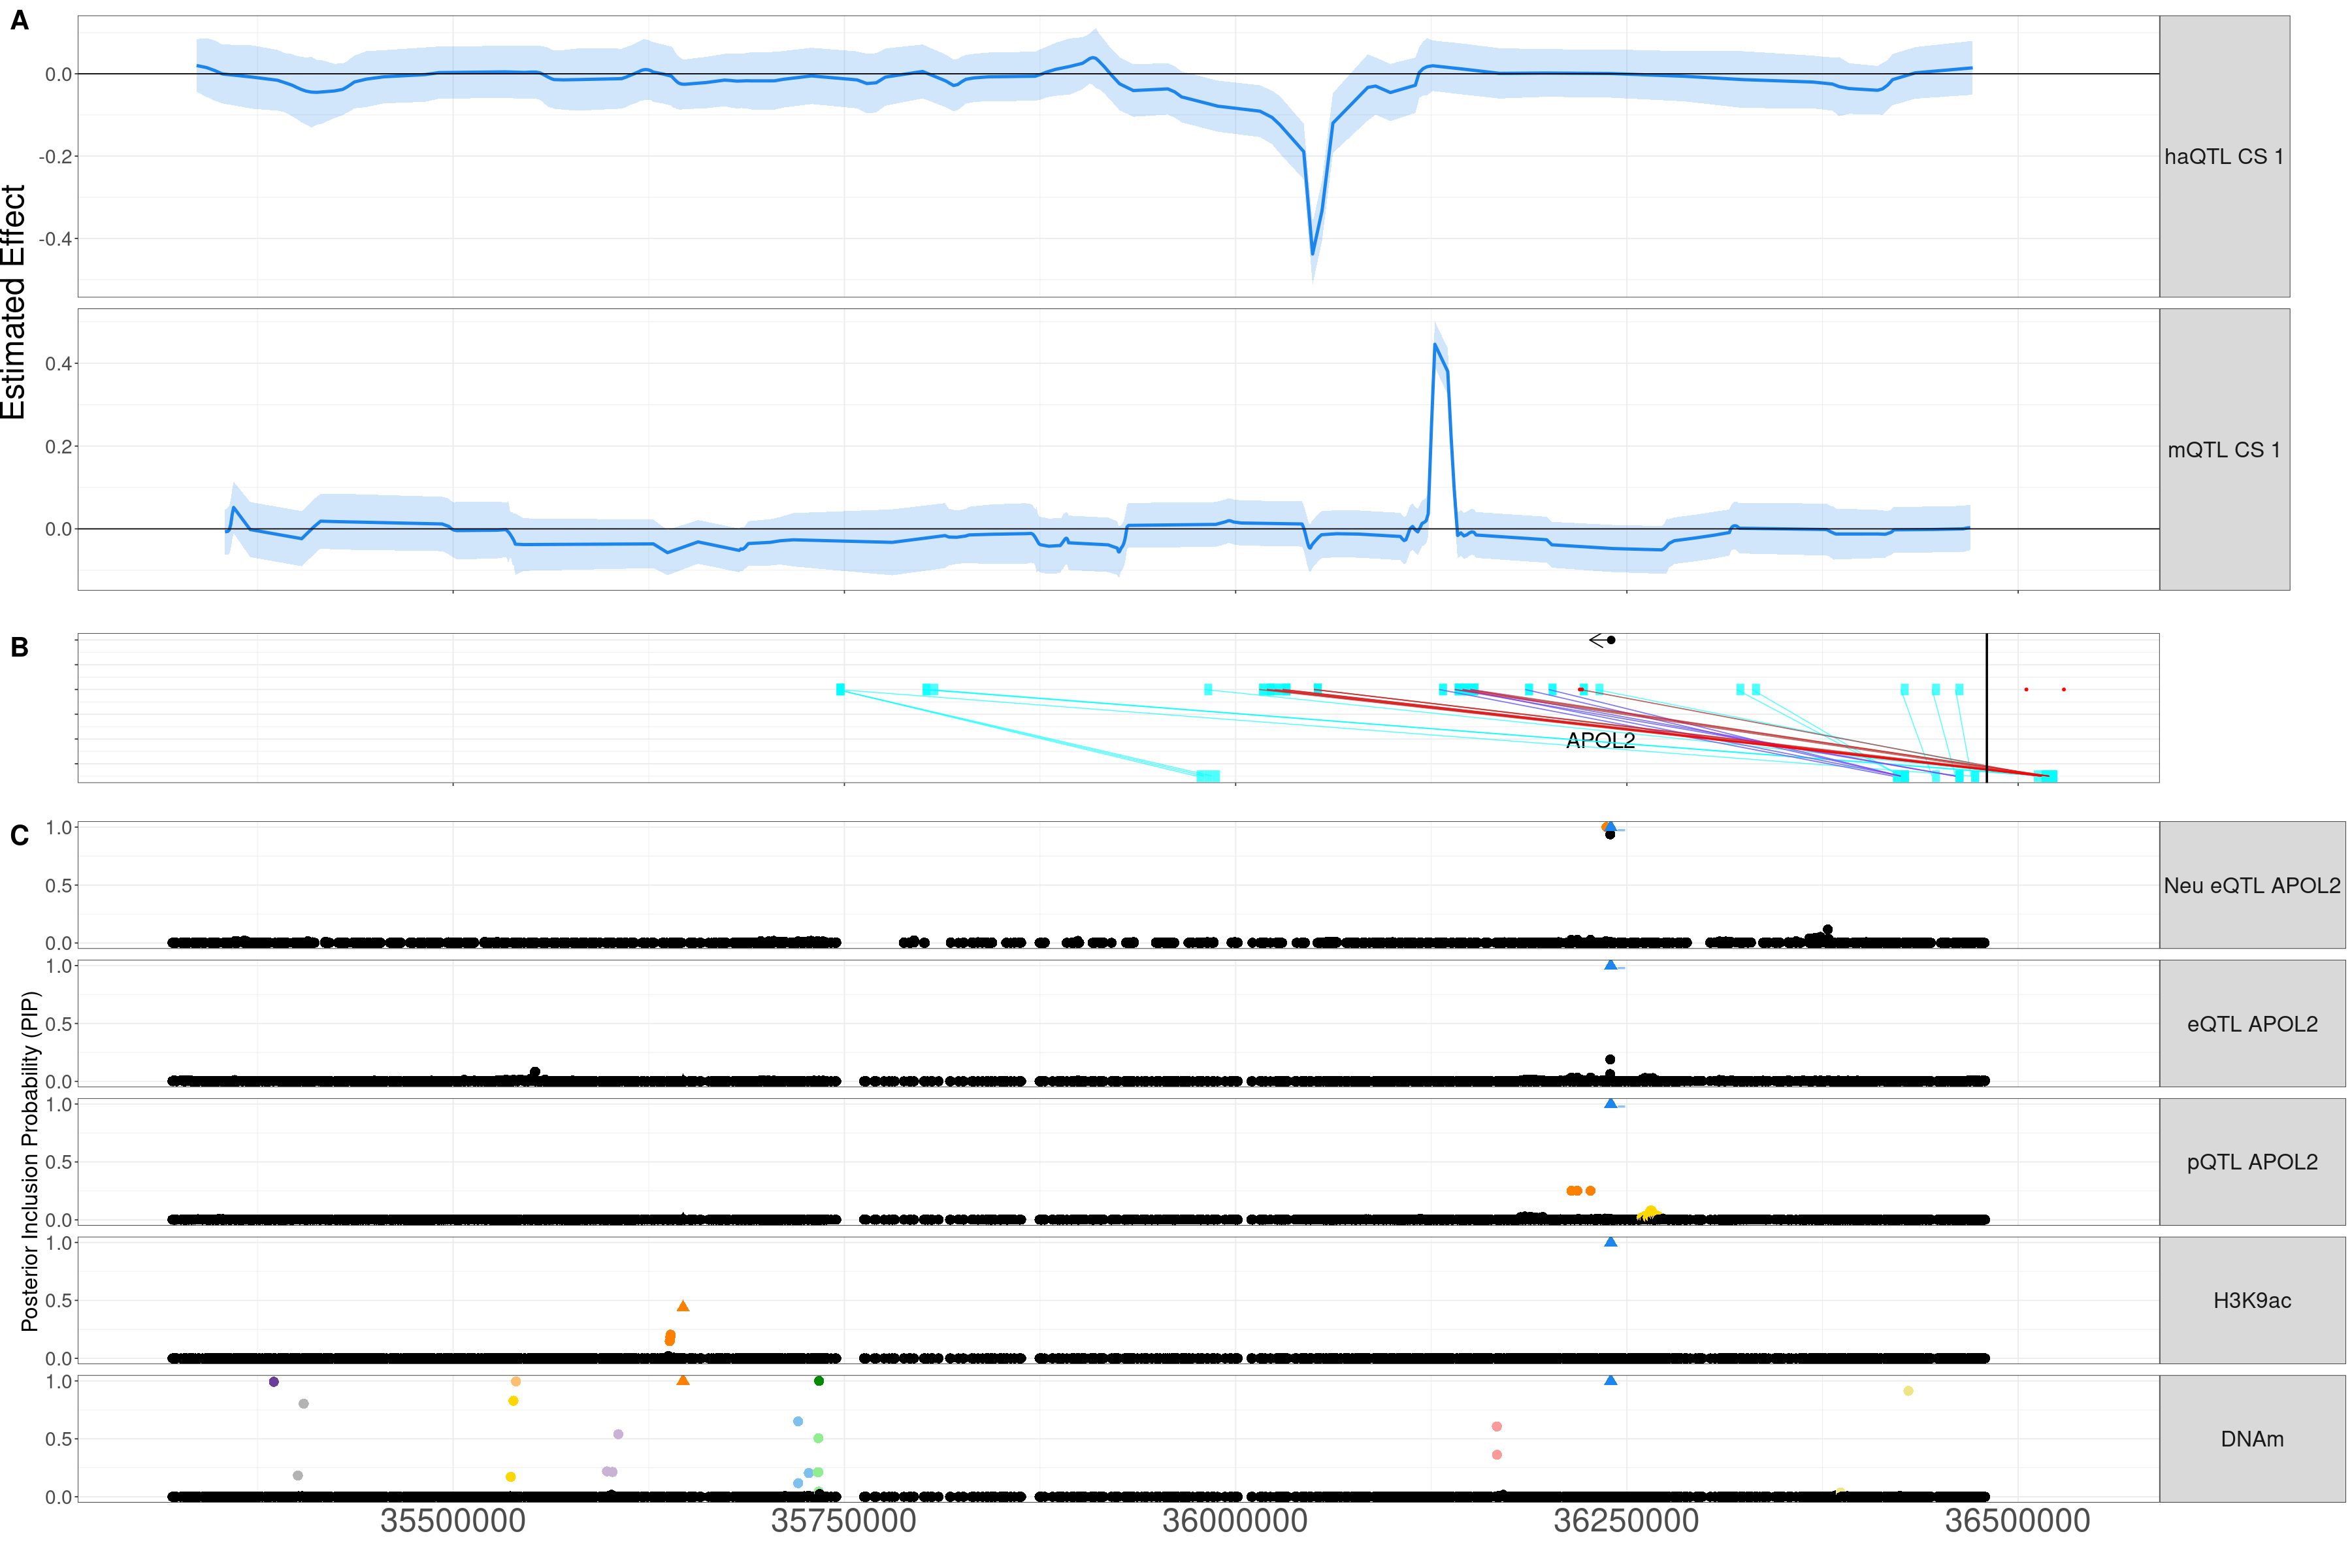

In [140]:
result_plot

In [ ]:
result_plot%>%ggsave(filename = "../plot/casestudy_1411.pdf",width = 20, height = 15, device = "pdf")
result_plot%>%ggsave(filename = "../plot/casestudy_1411.png",width = 20, height = 15, device = "png")

## Get remap supported interaction

In [15]:
remap = read_delim("../../neuro-mQTL/notebook/added_annotation/remap2022_crm_macs2_hg38_v1_0.bed.gz", col_names = F)

Rows: 3329428 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): X1, X4, X6
dbl (5): X2, X3, X5, X7, X8
num (1): X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
remap%>%select(X1:X5)%>%filter(str_detect(X4,"CTCF"))%>%filter()

In [28]:
annotation%>%filter(chr1 == chr_select,start1 > 36000000 , start1 < 36226209  , start1 > plot_range[[1]],start1 < plot_range[[2]],type =="Neu"  )%>%count(start1,end1)

start1,end1,n
<dbl>,<dbl>,<int>
36015000,36020000,1
36020000,36025000,2
36025000,36030000,1
36030000,36035000,2
36050000,36055000,2
36130000,36135000,1
36140000,36145000,2
36145000,36150000,2
36150000,36155000,2


In [60]:
annotation%>%filter(chr1 == chr_select,start2 > 36000000 , start2 < 36226209  , start1 > plot_range[[1]],start1 < plot_range[[2]],type =="Neu"  )%>%count(start1,end1)

start1,end1,n
<dbl>,<dbl>,<int>


In [62]:
annotation%>%filter(chr1 == chr_select,start1 > 36000000 , start1 < 36226209, start2 >=plot_range[[2]]  ) 

chr1,start1,end1,chr2,start2,end2,count,expected,fdr,ClusterLabel,ClusterSize,ClusterType,ClusterNegLog10P,ClusterSummit,type
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
chr22,36020000,36025000,chr22,36515000,36520000,9,1.815663,1.971948e-03,chr22_30,6,SharpPeak,26.614781,0,Neu
chr22,36020000,36025000,chr22,36520000,36525000,8,1.569901,3.452911e-03,chr22_30,6,SharpPeak,26.614781,0,Neu
chr22,36015000,36020000,chr22,36515000,36520000,10,1.932875,1.299447e-03,chr22_30,6,SharpPeak,26.614781,1,Neu
chr22,36025000,36030000,chr22,36515000,36520000,9,1.960483,5.482668e-03,chr22_30,6,SharpPeak,26.614781,0,Neu
chr22,36030000,36035000,chr22,36515000,36520000,9,2.035181,6.898428e-03,chr22_30,6,SharpPeak,26.614781,0,Neu
chr22,36050000,36055000,chr22,36515000,36520000,12,2.439995,4.914760e-04,chr22_194,2,SharpPeak,9.963536,1,Neu
chr22,36140000,36145000,chr22,36515000,36520000,10,2.394860,5.533468e-03,chr22_195,3,SharpPeak,15.305253,0,Neu
chr22,36220000,36225000,chr22,36515000,36520000,10,2.602876,9.464501e-03,chr22_117,2,SharpPeak,8.435499,0,Neu
chr22,36030000,36035000,chr22,36520000,36525000,8,1.726400,9.710175e-03,chr22_30,6,SharpPeak,26.614781,0,Neu


In [187]:
setdiff(simul_tf%>%filter(start2 > 36500000)%>%count(X4)%>%pull(X4),simul_tf%>%filter(start2 < 36500000)%>%count(X4)%>%pull(X4))%>%length()

[1] 27

In [188]:
setdiff(simul_tf%>%filter(start2 < 36500000)%>%count(X4)%>%pull(X4),simul_tf%>%filter(start2 > 36500000)%>%count(X4)%>%pull(X4))%>%length

[1] 107

In [189]:
intersect(simul_tf%>%filter(start2 > 36500000)%>%count(X4)%>%pull(X4),simul_tf%>%filter(start2 < 36500000)%>%count(X4)%>%pull(X4))%>%length()

[1] 27

In [191]:
nrow(simul_tf%>%count(X4))

[1] 161

In [179]:
setdiff(simul_tf%>%filter(start2 > 36500000)%>%count(X4)%>%pull(X4),simul_tf%>%filter(start2 < 36500000)%>%count(X4)%>%pull(X4))%>%length()

[1] "ARID2"   "BRD4"    "EBF1"    "FOS"     "FOSL1"   "GABPA"   "KLF4"   
 [8] "MAX"     "MEN1"    "MLLT1"   "MYC"     "OSR2"    "POU5F1"  "RAD21"  
[15] "RELA"    "SALL2"   "SMAD1"   "SMAD2-3" "SMAD4"   "SMARCA4" "STAT5B" 
[22] "SUPT6H"  "TRIM24"  "VDR"     "ZNF22"   "ZNF317"  "ZSCAN16"

In [180]:
intersect(simul_tf%>%filter(start2 > 36500000)%>%count(X4)%>%pull(X4),simul_tf%>%filter(start2 < 36500000)%>%count(X4)%>%pull(X4))

[1] "AR"      "ARNTL"   "ATF2"    "CEBPB"   "CLOCK"   "ERG"     "ESR1"   
 [8] "EZH2"    "FOXA1"   "GATA2"   "GATA6"   "IRF1"    "JUND"    "KDM1A"  
[15] "MED1"    "MED26"   "MYNN"    "NEUROD1" "SMAD3"   "SMC1A"   "SP1"    
[22] "SPI1"    "STAT3"   "TCF3"    "XRCC5"   "YY1"     "ZNF143"

In [182]:
setdiff(simul_tf%>%filter(start2 < 36500000)%>%count(X4)%>%pull(X4),simul_tf%>%filter(start2 > 36500000)%>%count(X4)%>%pull(X4))

[1] "ATF1"    "ATF3"    "BCL11A"  "BCL6"    "BCOR"    "BRD2"    "BRD3"   
  [8] "CBFA2T2" "CBFB"    "CC2D1A"  "CDKN1B"  "CEBPA"   "CREB1"   "CREM"   
 [15] "CTBP1"   "CTCF"    "DRAP1"   "E2F4"    "E2F6"    "E4F1"    "EGR1"   
 [22] "ELF1"    "ELF3"    "EP300"   "ETS1"    "ETV6"    "FIP1L1"  "FLI1"   
 [29] "FOXK2"   "FOXP1"   "GATA3"   "GATA4"   "GFI1B"   "GLIS1"   "GTF2F1" 
 [36] "HDAC1"   "HDAC2"   "HDAC3"   "HDGF"    "HMGXB4"  "HNF1B"   "HNF4A"  
 [43] "HOXA3"   "HSF1"    "IRF4"    "JUNB"    "KDM4A"   "KLF6"    "KLF9"   
 [50] "L3MBTL2" "LDB1"    "LIN54"   "LMO2"    "MAF"     "MAZ"     "MNT"    
 [57] "MYB"     "NFE2"    "NFE2L2"  "NFIC"    "NFYA"    "NR2F6"   "NR3C1"  
 [64] "PAXIP1"  "PGR"     "PHF8"    "PML"     "PPARG"   "PRDM14"  "RBBP5"  
 [71] "REST"    "RUNX1"   "SIN3A"   "SKI"     "SNAI2"   "STAG1"   "STAT1"  
 [78] "TAF1"    "TAF9B"   "TAL1"    "TBL1XR1" "TBP"     "TCF7L2"  "TEAD1"  
 [85] "TFE3"    "TP63"    "TRIM28"  "TWIST1"  "U2AF1"   "UBTF"    "USF1"   
 [92] "USF2"    "YY1AP1"  "ZBTB40"  "ZBTB7A"  "ZBTB7B"  "ZFP36"   "ZFX"    
 [99] "ZKSCAN1" "ZNF263"  "ZNF281"  "ZNF384"  "ZNF534"  "ZNF572"  "ZNF592" 
[106] "ZNF750"  "ZNF766"

In [174]:
simul_tf%>%filter(start2 < 36500000)%>%count(X4)

X4,n
<chr>,<int>
AR,1
ARNTL,2
ATF1,1
ATF2,1
ATF3,1
BCL11A,3
BCL6,1
BCOR,1
BRD2,4


In [59]:
annotation%>%filter(chr1 == chr_select,start1 > 36000000 , start1 < 36226209, start2 <=plot_range[[2]]  ) 

chr1,start1,end1,chr2,start2,end2,count,expected,fdr,ClusterLabel,ClusterSize,ClusterType,ClusterNegLog10P,ClusterSummit,type
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
chr22,36130000,36135000,chr22,36420000,36425000,11,2.821629,5.184681e-03,chr22_189,2,SharpPeak,11.575671,0,Neu
chr22,36145000,36150000,chr22,36425000,36430000,15,2.834892,2.817410e-05,chr22_189,2,SharpPeak,11.575671,1,Neu
chr22,36185000,36190000,chr22,36425000,36430000,14,3.324761,5.649606e-04,chr22_190,2,SharpPeak,9.712614,1,Neu
chr22,36200000,36205000,chr22,36425000,36430000,12,3.510051,8.493677e-03,chr22_190,2,SharpPeak,9.712614,0,Neu
chr22,36140000,36145000,chr22,36460000,36465000,12,2.749979,1.286975e-03,chr22_192,2,SharpPeak,11.429618,0,Neu
chr22,36150000,36155000,chr22,36460000,36465000,14,2.930637,1.617583e-04,chr22_192,2,SharpPeak,11.429618,1,Neu
chr22,36188952,36193954,chr22,36238954,36243954,23,5.862957,4.612844e-06,chr22_02242,1,Singleton,7.788342,1,Oli
chr22,36028952,36033952,chr22,36063952,36068952,35,12.179901,6.502774e-06,chr22_31,2,SharpPeak,12.436553,1,Oli
chr22,36063952,36068952,chr22,36118952,36123952,23,8.556661,1.125007e-03,chr22_32,3,SharpPeak,15.585395,0,Oli


In [38]:
annotation%>%filter(chr1 == chr_select,start1 > 36000000 , start1 < 36226209) -> annotation_filter

In [107]:
annotation_filter%>%count(start1,end1)

start1,end1,n
<dbl>,<dbl>,<int>
36015000,36020000,1
36020000,36025000,2
36025000,36030000,1
36028952,36033952,1
36030000,36035000,2
36033952,36038952,1
36050000,36055000,2
36063952,36068952,2
36068952,36073952,1


In [101]:
head(remap)

X1,X2,X3,X4,X5,X6,X7,X8,X9
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chr1,9829,10459,"TEAD4,ESRRA,ZNF157,TARDBP,ZBTB26,FEZF1,TSHZ1,E4F1,MNT,ZNF639,KLF1,NCOA1,SALL2,ZNF645,ZNF24,NFATC3,ZNF547,ZNF148,EHMT2,ZNF662,ZNF623,SMARCA4,NR2F1,TCF12,SMARCE1,MLLT1,ZFP3,ZNF2,AFF1,EP400,ZFP69B,KLF9,PATZ1,MCM3,HDAC1,E2F8,NR2C1,PRDM10,KLF17,NUFIP1,NBN,LEF1,EP300,ZBTB49,RELB,ZBTB8A,ZNF324,BCL11B,SP3,ZNF76,WT1,TRIM22,ZNF843,ZNF280D,GLI4,ZXDB,OSR2,MCM5,ZSCAN23,ZBTB40,ZNF239,KLF7,SCRT1,ZNF524,ZBTB7A,KLF8,PRDM4,GFI1B,NONO,ZNF18,REPIN1,ZSCAN18,ZSCAN4,BCL11A,ZNF488,ZNF680,ZNF629,ZSCAN16,ZNF146,ZNF664,TRIM24,ZNF133,INSM2,SNIP1,ZSCAN5A,GLIS1,ZNF184,NFRKB,SP7,BCL6B,ZNF692,ZNF707,ZBTB10,ZNF394,ZNF391,ZBTB48,ZNF169,ZNF580,ZBTB21,ZBTB5,CTCF,REST,GABPA,STAT3,MAF,SMC1A,CEBPB,TP63,ETV1,SMC1,TAL1,RAD21,CDK8,FOXP1,RAD51,TERF1",148,.,10101,10102,204120188
chr1,136455,137130,"NCOR1,HDAC1,MTA3,L3MBTL2,DPF2,ZBTB33,HES1,HDGF,ATF3,CTBP1,SMARCA5,BRD9,ZNF639,EGR1,NFIC,HDAC2,SKIL,MAF1,SMARCE1,NR2C1,ESR1,ARID1B,TRIM24,ZBTB40,ZBTB2,ZNF592",33,.,136762,136763,1115178
chr1,180674,180998,"NME2,STAT3,SMC1,NCOA2,SMC1A,ESR1,NBN,ZBTB40",12,.,180822,180823,1115178
chr1,181203,181789,"MED1,BRD3,CTCFL,POU5F1,MYC,SETDB1,FLI1,NRF1,TRIM24,CTCF",14,.,181462,181463,2158115
chr1,191531,191865,"FLI1,ERG",2,.,191702,191703,148148148
chr1,267963,268138,"SMAD1,ZBTB2,CTCF,RAD21,SMC3,STAG1",84,.,268034,268035,20214597


In [30]:
remap%>%select(X1:X5)%>%filter(X1 == "chr22")-> remap_filtered

In [36]:
remap_filtered%>%separate_rows(X4,sep = ",") -> remap_sep

In [44]:
left_join(remap_sep, annotation_filter, by = c("X1" = "chr1")) -> tmp

Warning message in left_join(remap_sep, annotation_filter, by = c(X1 = "chr1")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [51]:
tmp%>%filter(X2 >= start1 ,X2 <= end1)  -> all_tf_binds_to_start_1

In [164]:
inner_join(all_tf_binds_to_start_1%>%filter(type == "Neu")%>%count(start1,end1,start2,end2,X4),all_tf_binds_to_start_2%>%filter(type == "Neu")%>%count(start1,end1,start2,end2,X4))-> simul_tf

Joining with `by = join_by(start1, end1, start2, end2, X4, n)`


In [144]:
simul_tf%>%filter(start2 > 36500000)%>%pull(X4)

[1] "AR"      "FOS"     "FOXA1"   "MED1"    "MLLT1"   "RELA"    "SMAD1"  
  [8] "SP1"     "TCF3"    "ZNF143"  "ZSCAN16" "BRD4"    "ESR1"    "GATA2"  
 [15] "JUND"    "NEUROD1" "TCF3"    "YY1"     "ZSCAN16" "BRD4"    "ESR1"   
 [22] "EZH2"    "MYC"     "NEUROD1" "SPI1"    "ZNF317"  "ARNTL"   "EBF1"   
 [29] "MED26"   "MEN1"    "MLLT1"   "NEUROD1" "RELA"    "STAT5B"  "SUPT6H" 
 [36] "XRCC5"   "AR"      "CEBPB"   "ESR1"    "GABPA"   "JUND"    "KDM1A"  
 [43] "MED1"    "MYNN"    "SMAD1"   "SMAD3"   "SMAD4"   "SMARCA4" "SMC1A"  
 [50] "SP1"     "ZNF143"  "ZSCAN16" "ESR1"    "MAX"     "MYNN"    "OSR2"   
 [57] "RAD21"   "ZNF22"   "AR"      "ARID2"   "CEBPB"   "FOSL1"   "GABPA"  
 [64] "GATA6"   "IRF1"    "JUND"    "KDM1A"   "MED26"   "MYNN"    "POU5F1" 
 [71] "SMAD3"   "SMAD4"   "SP1"     "SPI1"    "TCF3"    "ATF2"    "ERG"    
 [78] "EZH2"    "KLF4"    "MAX"     "MYNN"    "RAD21"   "SALL2"   "SMAD2-3"
 [85] "STAT3"   "SUPT6H"  "VDR"     "BRD4"    "CLOCK"   "FOS"     "JUND"   
 [92] "MED26"   "POU5F1"  "SMC1A"   "SPI1"    "YY1"     "ERG"     "KLF4"   
 [99] "STAT3"   "ESR1"    "RAD21"   "TRIM24"  "ARNTL"   "BRD4"    "EBF1"   
[106] "FOS"     "GATA2"   "POU5F1"  "SMAD1"   "SMC1A"   "SPI1"    "TCF3"   
[113] "XRCC5"   "YY1"     "ZNF143"

In [121]:
simul_tf%>%filter(start2 > 36500000)%>%count(X4)%>%pull(X4)

[1] "AR"      "ARID2"   "ARNTL"   "ATF2"    "BRD4"    "CEBPB"   "CLOCK"  
 [8] "EBF1"    "ERG"     "ESR1"    "EZH2"    "FOS"     "FOSL1"   "FOXA1"  
[15] "GABPA"   "GATA2"   "GATA6"   "IRF1"    "JUND"    "KDM1A"   "KLF4"   
[22] "MAX"     "MED1"    "MED26"   "MEN1"    "MLLT1"   "MYC"     "MYNN"   
[29] "NEUROD1" "OSR2"    "POU5F1"  "RAD21"   "RELA"    "SALL2"   "SMAD1"  
[36] "SMAD2-3" "SMAD3"   "SMAD4"   "SMARCA4" "SMC1A"   "SP1"     "SPI1"   
[43] "STAT3"   "STAT5B"  "SUPT6H"  "TCF3"    "TRIM24"  "VDR"     "XRCC5"  
[50] "YY1"     "ZNF143"  "ZNF22"   "ZNF317"  "ZSCAN16"

In [148]:
simul_tf%>%arrange(X4)%>%pull(X4)%>%unique%>%as_tibble()%>%write_delim("tf_list")

In [145]:
simul_tf%>%pull(X4)%>%unique%>%length()

[1] 390

In [113]:
all_tf_binds_to_start_2%>%count(start1,end1,start2,end2,X4)

start1,end1,start2,end2,X4,n
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
36015000,36020000,36515000,36520000,AGO1,1
36015000,36020000,36515000,36520000,AR,1
36015000,36020000,36515000,36520000,ARID2,1
36015000,36020000,36515000,36520000,ARNTL,2
36015000,36020000,36515000,36520000,ARRB1,1
36015000,36020000,36515000,36520000,BRD4,4
36015000,36020000,36515000,36520000,CEBPB,1
36015000,36020000,36515000,36520000,CLOCK,1
36015000,36020000,36515000,36520000,DNMT3B,3


In [128]:
ha_peaks = read_delim("/mnt//vast/hpc//csg//molecular_phenotype_calling//QTL_fine_mapping//ha_peak_list")

Rows: 92401 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): #chr, ID
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [137]:
ha_peaks%>%filter(`#chr` == "chr22", start > 36500000, start < 36530000 )

#chr,start,end,ID
<chr>,<dbl>,<dbl>,<chr>
chr22,36505275,36505276,22_36504974_36505577_peak_89620
chr22,36507166,36507167,22_36506468_36507864_peak_89621
chr22,36529241,36529242,22_36528121_36530362_peak_89622


In [72]:
tmp%>%filter(X2 >= start2 ,X2 <= end2, start2 <= 36500000)  -> all_tf_binds_to_start_2_1
tmp%>%filter(X2 >= start2 ,X2 <= end2, start2 >= 36500000)  -> all_tf_binds_to_start_2_2

In [73]:
intersect(all_tf_binds_to_start_1$X4,all_tf_binds_to_start_2_1$X4)-> common_TF_within_tad
intersect(all_tf_binds_to_start_1$X4,all_tf_binds_to_start_2_2$X4)-> common_TF_outside_tad

In [77]:
setdiff(common_TF_outside_tad,common_TF_within_tad)

[1] "SMAD5"  "ZNF362" "SALL2"

In [54]:
all_tf_binds_to_start_1 %>%count(X4,start2)%>%count(X4)

X4,n
<chr>,<int>
AFF1,3
AFF4,4
AGO1,3
AHR,2
APC,3
AR,9
ARHGAP35,2
ARID1A,5
ARID1B,6


In [184]:
simul_tf%>%write_delim("../data/case_study_tad1411/4_tad1411_annotation_simul_tf","\t")

In [186]:
simul_tf%>%filter(X4 %in% c("BRD4","TRIM24"))

start1,end1,start2,end2,X4,n
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
36020000,36025000,36515000,36520000,BRD4,4
36020000,36025000,36520000,36525000,BRD4,4
36140000,36145000,36515000,36520000,BRD4,4
36150000,36155000,36520000,36525000,TRIM24,1
36220000,36225000,36515000,36520000,BRD4,4


In [ ]:
### Red specific TF

In [179]:
setdiff(simul_tf%>%filter(start2 > 36500000)%>%count(X4)%>%pull(X4),simul_tf%>%filter(start2 < 36500000)%>%count(X4)%>%pull(X4))

[1] "ARID2"   "BRD4"    "EBF1"    "FOS"     "FOSL1"   "GABPA"   "KLF4"   
 [8] "MAX"     "MEN1"    "MLLT1"   "MYC"     "OSR2"    "POU5F1"  "RAD21"  
[15] "RELA"    "SALL2"   "SMAD1"   "SMAD2-3" "SMAD4"   "SMARCA4" "STAT5B" 
[22] "SUPT6H"  "TRIM24"  "VDR"     "ZNF22"   "ZNF317"  "ZSCAN16"

In [ ]:
### Purple specific TF

In [182]:
setdiff(simul_tf%>%filter(start2 < 36500000)%>%count(X4)%>%pull(X4),simul_tf%>%filter(start2 > 36500000)%>%count(X4)%>%pull(X4))

[1] "ATF1"    "ATF3"    "BCL11A"  "BCL6"    "BCOR"    "BRD2"    "BRD3"   
  [8] "CBFA2T2" "CBFB"    "CC2D1A"  "CDKN1B"  "CEBPA"   "CREB1"   "CREM"   
 [15] "CTBP1"   "CTCF"    "DRAP1"   "E2F4"    "E2F6"    "E4F1"    "EGR1"   
 [22] "ELF1"    "ELF3"    "EP300"   "ETS1"    "ETV6"    "FIP1L1"  "FLI1"   
 [29] "FOXK2"   "FOXP1"   "GATA3"   "GATA4"   "GFI1B"   "GLIS1"   "GTF2F1" 
 [36] "HDAC1"   "HDAC2"   "HDAC3"   "HDGF"    "HMGXB4"  "HNF1B"   "HNF4A"  
 [43] "HOXA3"   "HSF1"    "IRF4"    "JUNB"    "KDM4A"   "KLF6"    "KLF9"   
 [50] "L3MBTL2" "LDB1"    "LIN54"   "LMO2"    "MAF"     "MAZ"     "MNT"    
 [57] "MYB"     "NFE2"    "NFE2L2"  "NFIC"    "NFYA"    "NR2F6"   "NR3C1"  
 [64] "PAXIP1"  "PGR"     "PHF8"    "PML"     "PPARG"   "PRDM14"  "RBBP5"  
 [71] "REST"    "RUNX1"   "SIN3A"   "SKI"     "SNAI2"   "STAG1"   "STAT1"  
 [78] "TAF1"    "TAF9B"   "TAL1"    "TBL1XR1" "TBP"     "TCF7L2"  "TEAD1"  
 [85] "TFE3"    "TP63"    "TRIM28"  "TWIST1"  "U2AF1"   "UBTF"    "USF1"   
 [92] "USF2"    "YY1AP1"  "ZBTB40"  "ZBTB7A"  "ZBTB7B"  "ZFP36"   "ZFX"    
 [99] "ZKSCAN1" "ZNF263"  "ZNF281"  "ZNF384"  "ZNF534"  "ZNF572"  "ZNF592" 
[106] "ZNF750"  "ZNF766"

### Shared TF

In [180]:
intersect(simul_tf%>%filter(start2 > 36500000)%>%count(X4)%>%pull(X4),simul_tf%>%filter(start2 < 36500000)%>%count(X4)%>%pull(X4))

[1] "AR"      "ARNTL"   "ATF2"    "CEBPB"   "CLOCK"   "ERG"     "ESR1"   
 [8] "EZH2"    "FOXA1"   "GATA2"   "GATA6"   "IRF1"    "JUND"    "KDM1A"  
[15] "MED1"    "MED26"   "MYNN"    "NEUROD1" "SMAD3"   "SMC1A"   "SP1"    
[22] "SPI1"    "STAT3"   "TCF3"    "XRCC5"   "YY1"     "ZNF143"

Rows: 193706 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
chr (7): X1, X2, X3, X6, X7, X8, X9
dbl (2): X4, X5

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 384 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): #chr, effect, type
dbl (4): pos, mid, up, low

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): #chr, gene_id, gene_name
dbl (4): start, end, strand, plot_group

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



    Oli MND1    Oli TRIM2 Oli TMEM131L     TMEM131L       H3K9ac         DNAm 
        1354         1354         1354         1354         1354         1354 

Warning message in geom_point(aes(x = X4, xend = X5, y = 0.89, yend = 0.89), size = 2, :
“Ignoring unknown aesthetics: xend and yend”
Warning message in geom_point(aes(x = X4, xend = X5, y = 0.89, yend = 0.89), size = 2, :
“Ignoring unknown aesthetics: xend and yend”
New names:
• `` -> `...1`
Rows: 61895 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): chr1, chr2, ClusterLabel, ClusterType
dbl (11): ...1, start1, end1, start2, end2, count, expected, fdr, ClusterSiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 61895 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): chr1, chr2, ClusterLabel, ClusterType
dbl (11): ...1, start1, end1, start2, end2, count, expected, fdr, ClusterSiz...

ℹ Use `spec()` to retrieve

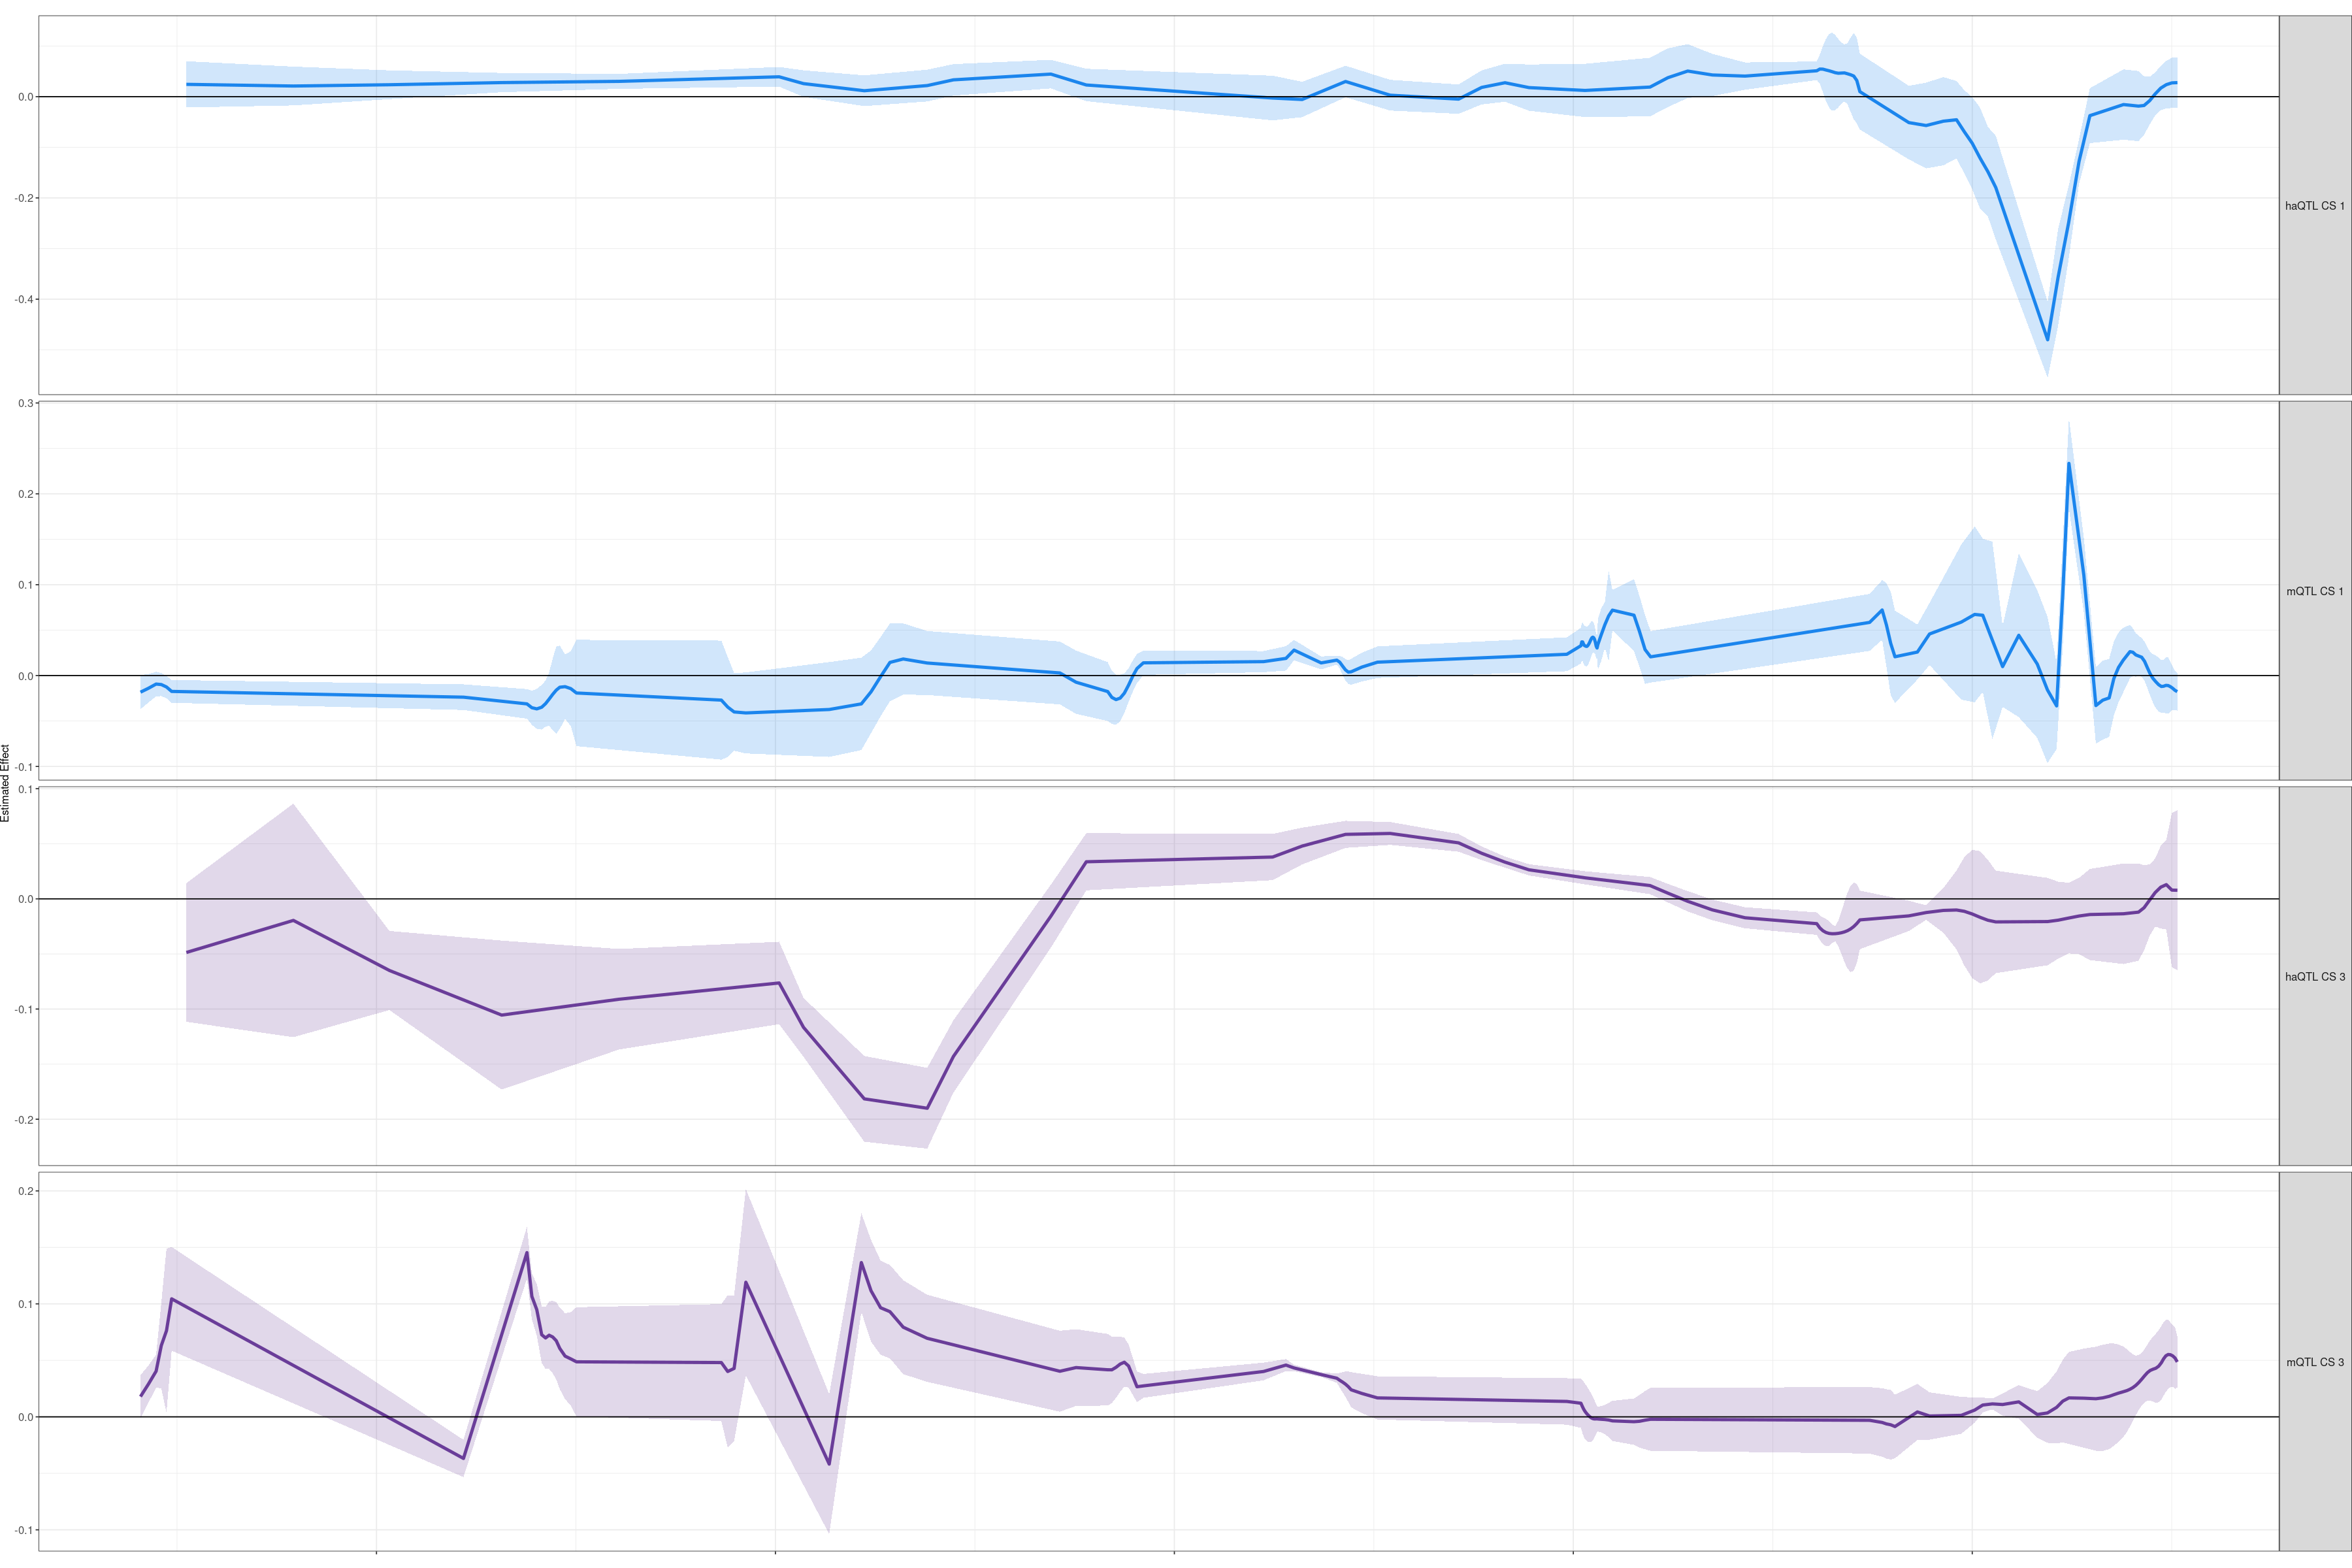

In [212]:
library("dplyr")
library("readr")
library("stringr")
library("purrr")
library("tidyr")
library("ggplot2")
library("cowplot")
library("ComplexUpset")
corresponding_vector <- c(153483848, 153488848, 153498848, 153523848, 153528848, 153533848, 153563848, 153573848, 153583848)

# Not Corresponding to 153343848 in Start1
not_corresponding_vector <- c(153488848, 153523848, 153528848, 153533848, 153573848)

n = c(1,2,3,4)
read_delim("../data/resource/Homo_sapiens.GRCh38.103.chr.reformatted.ERCC_chr4_chr22.gtf.gz", col_names   = 0, skip = 1)%>%
filter(X1 == "chr4", X4 > plot_range[[1]],X5 < plot_range[[2]] , str_detect(X9, "TRIM2" ) |str_detect(X9, "TMEM131L" ) | str_detect(X9, "MND1" )   )%>%
mutate(gene_name =  map(X9,~read.table(text = .x , sep = "\"")$V6 ))-> annotated

color = color2 = c("black", "dodgerblue2", "#6A3D9A","#FF7F00","skyblue2","#6A3D9A",
                   "gold1",  "#FB9A99", "palegreen2",
                   "#CAB2D6", "#FDBF6F", "gray70", "khaki2", "maroon", "orchid1",
                   "deeppink1", "blue1", "steelblue4", "darkturquoise", "green1",
                   "yellow4", "yellow3","darkorange4","brown","navyblue","#FF0000",
                   "darkgreen","#FFFF00","purple","#00FF00","pink","#0000FF",
                   "orange","#FF00FF","cyan","#00FFFF","#FFFFFF")



effect <- read_delim("../data/case_study_tad435/4_435_effect_refined.tsv")

#refine_effect_plot =  read_delim(paste(path,"4_1182_effect.tsv", sep=""))
refine_effect_plot<-  ggplot( effect  )+
  geom_line(aes(x = pos, y = mid,color = effect), size=1.4)+
  geom_ribbon(aes(x = pos,
                  y = mid,
                  ymin = low,
                  ymax = up,
                  fill = effect),
              alpha = 0.2)+
  ylab("Estimated Effect") +
  xlab("POS")+
  facet_grid(factor(type,levels =  c("haQTL_Effect_1",
                                     "mQTL_Effect_1",
                                     "haQTL_Effect_3",
                                     "mQTL_Effect_3"),
                    labels =   c("haQTL CS 1",
                                 "mQTL CS 1",
                                 "haQTL CS 3",
                                 "mQTL CS 3")
  )~., scales = "free" )+
  scale_color_manual("Credible set",values = color2[n+1])+
  geom_hline(aes(yintercept = 0), color = "black")+
  scale_fill_manual("Credible set",values = color2[n+1])+
  theme_bw()+
  xlab("") +
  ylab("Estimated Effect")+
  theme(text = element_text(size = 10),
        legend.position="none")+
  theme(plot.margin=unit(c(5,0,0,0),"mm"),
        strip.text.y.right = element_text(angle = 0,
                                          size = 10),
        axis.text.x = element_blank(),
        axis.text.y = element_text(size = 10)
  )


refine_effect_plot
gene_plot  = read_delim("../data/case_study_tad435/4_435_gene.tsv")
#gene_plot[4,] = gene_plot[3,]
#gene_plot[4,] = list("chr15",34075155,33858782, "ENSG00000169857" , "AVEN" ,2,2 )
plot_range = c(153120464,153679654)
gene_plot$x_label <- (0.5*(gene_plot$end-gene_plot$start)+gene_plot$start)
#gene_plot$x_label[which(gene_plot$gene_name=="CHRM5")] <- gene_plot$x_label[which(gene_plot$gene_name=="CHRM5")]+20000
n = 0.9
gene_plot_plot <-ggplot(gene_plot,aes()) +
  geom_segment( aes(x = start,xend = end, y = (n-strand/100), yend =(n-strand/100) ) ,
                arrow = arrow(length = unit(0.5, "cm")) )+
  geom_text(aes(x = x_label,y = 0.875, label = gene_name, vjust=-1),
            size = 7)+
  ylab("")+
  xlab("")+
  theme(legend.position="none")+
  theme(text = element_blank())+
  xlim(plot_range)+
  geom_point(aes(x = start, y = (n-strand/100)),
             color = "black",size = 3  ) 


refine_plot =read_delim("../data/case_study_tad435/4_435_pip_oli.tsv")
refine_plot$molecular_trait_id  [ which(refine_plot$molecular_trait_id =="Oli_eQTL_TMEM131L" )]<- "Oli TMEM131L"
refine_plot$molecular_trait_id  [ which(refine_plot$molecular_trait_id =="Oli_eQTL_MND1" )]<- "Oli MND1"
refine_plot$molecular_trait_id  [ which(refine_plot$molecular_trait_id =="Oli_eQTL_TRIM2" )]<- "Oli TRIM2"
refine_plot$molecular_trait_id  [ which(refine_plot$molecular_trait_id =="eQTL_TMEM131L" )]<- "TMEM131L"
refine_plot$molecular_trait_id  [ which(refine_plot$molecular_trait_id =="haQTL_tad435" )]<- "H3K9ac"
refine_plot$molecular_trait_id  [ which(refine_plot$molecular_trait_id =="mQTL_tad435" )]<- "DNAm"
refine_plot$molecular_trait_id <- factor(refine_plot$molecular_trait_id , levels = c("Oli MND1","Oli TRIM2", "Oli TMEM131L","TMEM131L",
                                                                                      "H3K9ac",
                                                                                      "DNAm" ))
color = color2 = c("black", "dodgerblue2","green4","#6A3D9A","skyblue2", "#FF7F00",
                   "gold1",  "#FB9A99", "palegreen2",
                   "#CAB2D6", "#FDBF6F", "gray70", "khaki2", "maroon", "orchid1",
                   "deeppink1", "blue1", "steelblue4", "darkturquoise", "green1",
                   "yellow4", "yellow3","darkorange4","brown","navyblue","#FF0000",
                   "darkgreen","#FFFF00","purple","#00FF00","pink","#0000FF",
                   "orange","#FF00FF","cyan","#00FFFF","#FFFFFF")%>%unique()
#### Change coloring of non-overlap CS
refine_plot%>%mutate(new_CS = case_when(molecular_trait_id == "Oli TMEM131L" & new_CS == 2 ~  9,
                                    molecular_trait_id == "H3K9ac" & new_CS == 2 ~  10,
                                     molecular_trait_id == "DNAm" & !Shared & new_CS == 1 ~  11,
                                    .default = new_CS 
                                   ))-> refine_plot
refine_plot%>%mutate(new_CS = case_when(
                                     molecular_trait_id == "DNAm" & !Shared & CS == 3 ~  12,
                                    .default = new_CS 
                                   ))-> refine_plot



### Add sign annotation, see pseudobulk notebook for code to gather this info
sign = 
 refine_plot%>%group_by(molecular_trait_id, new_CS)%>%
    summarize(pos = max(pos[which(y == max(y))]), y = max(y))%>%filter(new_CS != 0)%>%
    filter(!molecular_trait_id%in% c("H3K9ac", "DNAm")) %>%ungroup%>%mutate(sign = c("-","-","-","+","-") )
refine_plot = left_join(refine_plot,sign)



table(refine_plot$molecular_trait_id )
refine_plot  <-  ggplot2::ggplot(refine_plot,aes(y = y,
                                                 x = pos,
                                                 col =  as.factor(new_CS),
                                                 shape = Shared )) +
    geom_text( aes(x =pos + 6000, y = y ,color =  as.factor(new_CS), label = sign ),alpha = 0.5 , size = 10)+
  facet_grid(molecular_trait_id ~.)+
  geom_point(size = 4) +
  scale_color_manual("CS",values = color) +
  theme_bw()+
  theme(axis.ticks.x = element_blank()) +
  ylab("Posterior Inclusion Probability (PIP)")+
  xlim(plot_range)+
  theme(axis.ticks.x = element_blank() ) +
  theme(strip.text.y.right = element_text(angle = 0))+
  xlab("") +
  theme(text = element_text(size = 10),legend.position = "bottom")

cowplot::plot_grid(plotlist = list(refine_effect_plot+theme(strip.text.y.right = element_text(angle = 0,size = 20),panel.spacing=unit(0.7, "lines"),axis.text.y = element_text(size = 18))+
                                     xlim(plot_range)+
                                     theme(text = element_text(size = 30)),#microglia_enhancer_activity,#+facet_grid(TargetGene_name~., scales = "free"),
                                   gene_plot_plot+
                                     theme_bw()+
                                     theme(axis.text.x = element_blank(),
                                           axis.text.y = element_blank()) +
                                     theme(strip.text.y.right = element_text(angle = 0))+
                                     xlab("") +geom_point( aes(x = X4,xend = X5, y = 0.89 , yend = 0.89 ),size = 2, color  = "darkgreen", data = annotated%>%count(X3,X4,X5)%>%filter(X3 %in% c("transcript")))+
                                     xlab("") +geom_point( aes(x = X4,xend = X5, y = 0.89 , yend = 0.89 ),size = 2, color  = "red", data = annotated%>%count(X3,X4,X5)%>%filter(X3 %in% c("transcript"), X4 ==153601955 |X4 ==153632364  ))+
                                   #geom_segment( aes(x = X4,xend = X5, y = 0.815 , yend = 0.815 ),size = 7, color  = "red", data = annotated%>%count(X3,X4,X5)%>%filter(X3 %in% c("exom")))+
                                     #geom_point( aes(x = start,xend = end, y = 0.815 , yend = 0.815 ),size = 1, color  = "blue", data = cpg%>%filter(`#chr` == "chr4"))+
                                    # geom_point( aes(x = 153297198 ,xend = end, y = 0.815 , yend = 0.815 ),size = 1, color  = "red", data = cpg%>%filter(`#chr` == "chr4"))+
                                   ##geom_point( aes(x = start,xend = end, y = 0.815 , yend = 0.815),alpha = 0.5,size = 2, color  = "green", data = ha%>%filter(`#chr` == "chr4")) +
                                     #geom_segment( aes(x = start,xend = end, y = 0.5, yend = 0.5 ),size = 10, color  = "yellow", data = annot_ATAT_seq%>%filter(chr == "chr15", start > plot_range[[1]],end < plot_range[[2]]  )  ) +
                                     #geom_segment( aes(x = start,xend = end, y = 0.825, yend = 0.825 ),size = 3,color  = "cyan", data = read_delim("./added_annotation/Oli_hg38.pro.Nott.tsv")%>%filter(chr == "chr15", start > plot_range[[1]],end < plot_range[[2]]  )  ) +
                                   geom_segment( aes(x = start,xend = end, y = 0.87, yend = 0.87 ),alpha = 0.7,size = 5, color  = "cyan", data = read_delim("../data/resource//Oli_hg38.Int.Nott.tsv")%>%select(start = start1, end = end1, chr = chr1)%>%filter(chr == "chr4", start > plot_range[[1]],end < plot_range[[2]]  )  ) +
                                   geom_segment( aes(x = start,xend = end, y = 0.835, yend = 0.835 ),alpha = 0.7,size = 5, color  = "cyan", data = read_delim("../data/resource//Oli_hg38.Int.Nott.tsv")%>%select(start = start2, end = end2, chr = chr2,start1)%>%filter(chr == "chr4", start1 > plot_range[[1]],end < plot_range[[2]]  )  ) +
                                   #geom_segment( aes(x = start,xend = end, y = 0.835, yend = 0.835 ),alpha = 0.7,size = 5, color  = "blue", data = read_delim("./added_annotation/Oli_hg38.Int.Nott.tsv")%>%select(start = start1, end = end1, chr = chr1)%>%filter(chr == "chr4", start %in% c(153333848,153343848)  )  ) +

                                   #geom_segment( aes(x = start,xend = end, y = 0.88, yend = 0.88 ),alpha = 0.7,size = 5, color  = "blue", data = read_delim("./added_annotation/Oli_hg38.Int.Nott.tsv")%>%select(start = start2, end = end2, chr = chr2,start1)%>%filter(chr == "chr4", start1  %in% c(153333848,153343848) )  ) +
                                   #geom_segment( aes(x = start,xend = end, y = 0.835, yend = 0.835 ),alpha = 0.7,size = 5, color  = "cyan", data = read_delim("./added_annotation/Ast_hg38.Enh.Nott.tsv")%>%filter(chr == "chr4", start > plot_range[[1]],end < plot_range[[2]]  )  ) +
                                   #geom_segment( aes(x = start,xend = end, y = 0.835, yend = 0.835 ),alpha = 0.7,size = 5, color  = "blue", data = read_delim("./added_annotation/microglia_hg38.Enh.Nott.tsv")%>%filter(chr == "chr4", start > plot_range[[1]],end < plot_range[[2]]  )  ) +
                                   #geom_segment( aes(x = start,xend = end, y = 0.835, yend = 0.835 ),alpha = 0.7,size = 5, color  = "red", data = read_delim("./added_annotation/Neu_hg38.Enh.Nott.tsv")%>%filter(chr == "chr4", start > plot_range[[1]],end < plot_range[[2]]  )  ) +
                                   geom_segment( aes(x = start1,xend = start2, y = 0.87, yend =  0.835),alpha = 0.2,size = 0.5, color  = "cyan", data = read_delim("../data/resource/Oli_hg38.Int.Nott.tsv")%>%filter(chr1 == "chr4", start2 > plot_range[[1]],end2 < plot_range[[2]]  )  ) +
                                   geom_segment( aes(x = start1,xend = start2, y = 0.87, yend = 0.835 ),alpha = 0.6,size = 0.5, color  = "purple", data = read_delim("../data/resource/Oli_hg38.Int.Nott.tsv")%>%filter(chr1 == "chr4", start1  == 153333848 , start2  %in% corresponding_vector   )  ) +
                                   geom_segment( aes(x = start1,xend = start2, y = 0.87, yend = 0.835 ),alpha = 0.6,size = 0.5, color  = "purple", data = read_delim("../data/resource/Oli_hg38.Int.Nott.tsv")%>%filter(chr1 == "chr4", start1  == 153343848 , start2  %in% not_corresponding_vector   )  ) +
                                   xlab("") +geom_segment( aes(x = X4,xend = X5, y = 0.89 , yend = 0.89 ),size = 4,alpha = 0.3, color  = "green", data = read_delim("../data/case_study_tad435/4_435_gene_exom.tsv","\t"))+  
                                   #geom_segment(aes(x = 153234136,xend = 153248662, y = 0.9,yend = 0.9),color = "red")+ geom_segment(aes(x = 153295613,xend = 153307939, y = 0.9,yend = 0.9),color = "red") +
                                   #geom_point( aes(x = BP, y = 0.6 ),size = 1, color  = "black", data = enh)+
                                     theme(text = element_text(size = 20)),
                                   refine_plot+
                                     theme_bw()+
                                     theme(axis.ticks.x = element_blank()) +
                                     theme(strip.text.y.right = element_text(angle = 0,size = 20))+
                                     xlab("") +ylim(c(0,1))+
                    
                        
                                     theme(text = element_text(size = 20),axis.text.x = element_text(size = 30), axis.text.y = element_text(size = 18), 
                                           panel.spacing=unit(0.7, "lines"),legend.position = "none")+scale_y_continuous(breaks = c(0,0.5,1))
                                   
) ,
ncol = 1,
align = "v",
axis = "tlbr",
rel_heights = c(5,2,6),labels  = c("A","B","C"),label_size = 25
) -> result_plot

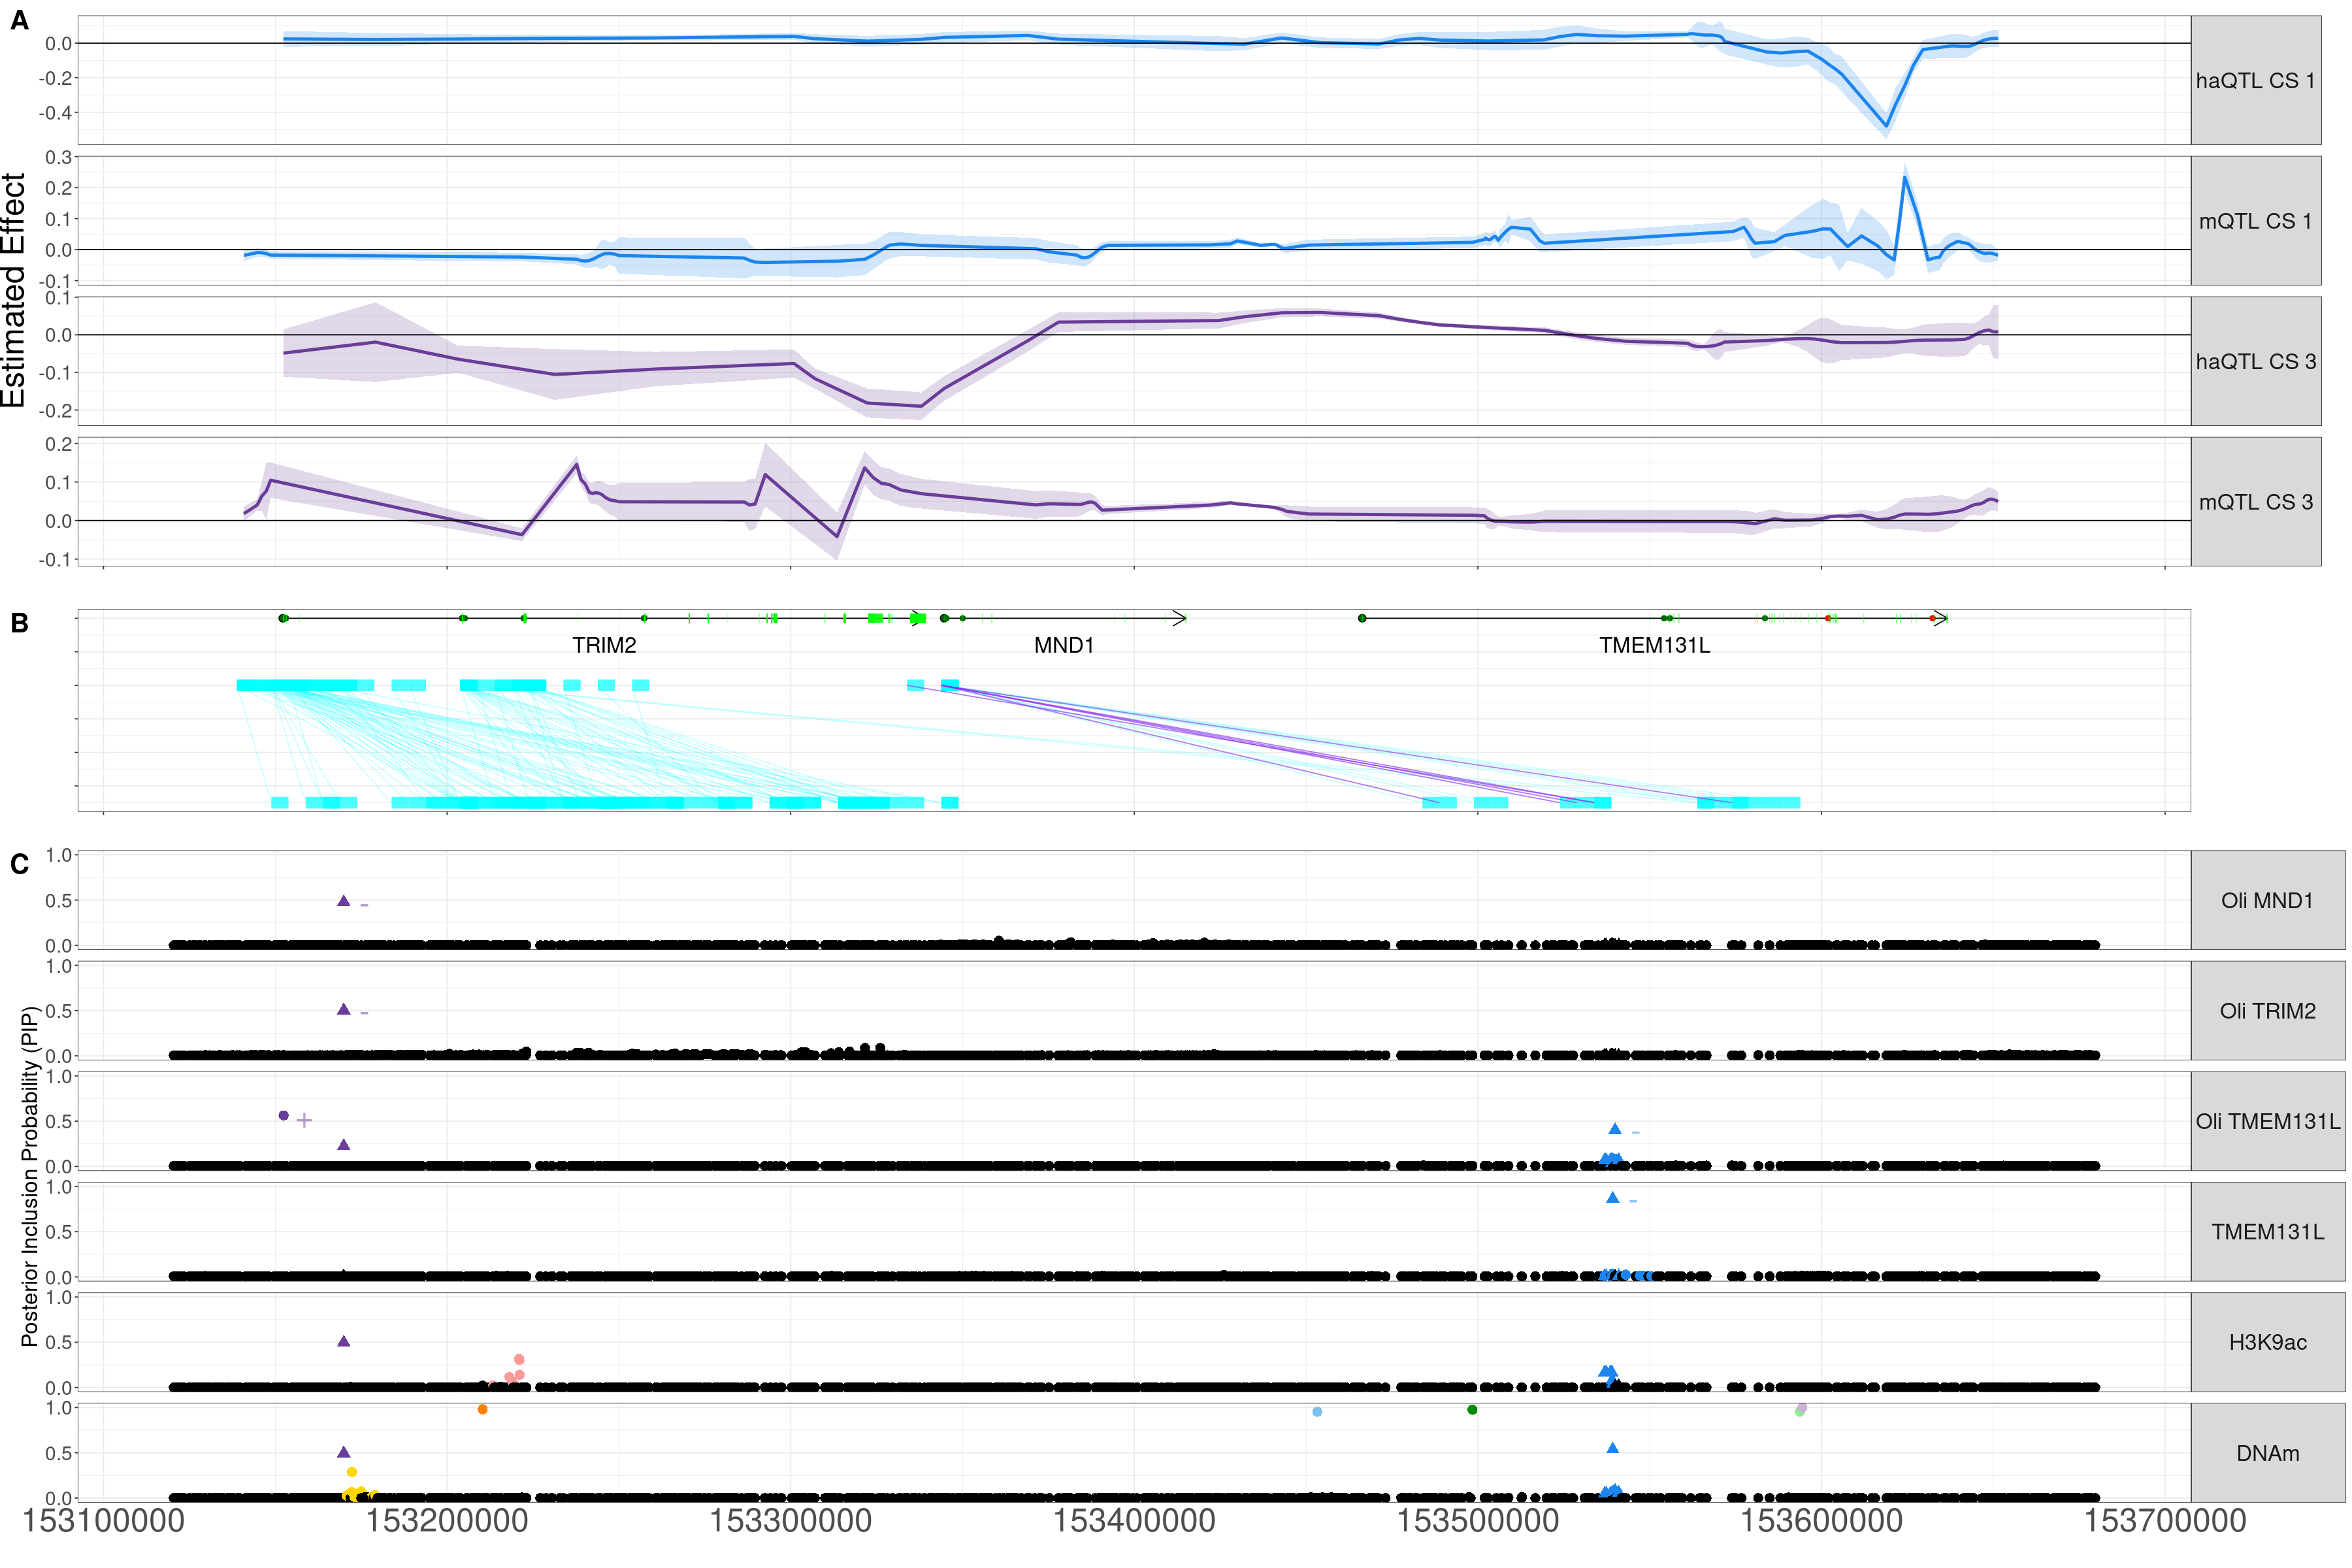

In [213]:
result_plot